In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from CoolProp import AbstractState
from CoolProp.CoolProp import PhaseSI, PropsSI, get_global_param_string
import scipy.constants as const

/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/1260706165.py:23: RuntimeWarning: divide by zero encountered in divide
  return nmax*np.exp(-1*(R*T/(a+b*T))**2*np.log(p0/p)**2)
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/1260706165.py:14: RuntimeWarning: divide by zero encountered in divide
  return nmax*np.exp(-1*(R*T/(a+b*T))**2*np.log(p0/p)**2)-Va*rho


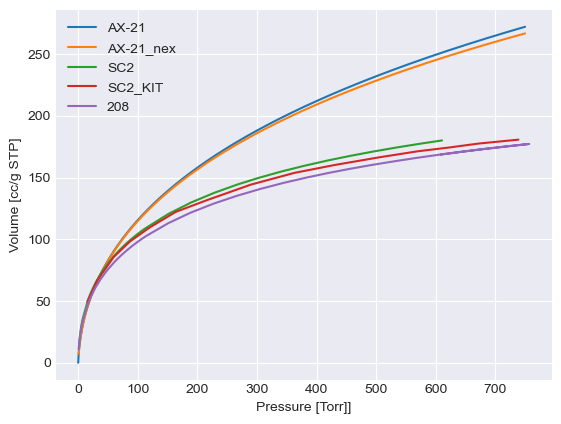

In [354]:


df1 = pd.read_csv('NZSC2V2_H2_77K_65p__iq_phisy_st1_2024_05_14_14_33_13 (Absolute Isotherm)-1.csv')
df2 = pd.read_csv('NZ208V2_H2_77K_65p__iq_phisy_st2_2024_05_14_14_33_14 (Absolute Isotherm)-1.csv')
df3 = pd.read_csv('Default Dataset.csv')

def nex(p,T,Va):
    
    nmax=71.6
    p0=1470
    a=3080
    b=18.9
    R=8.314
    rho=PropsSI("Dmolar", "P", p*1000000, "T", T, "Hydrogen")
    #print(rho)
    return nmax*np.exp(-1*(R*T/(a+b*T))**2*np.log(p0/p)**2)-Va*rho
def nab(p,T):
    nmax=71.6
    p0=1470
    a=3080
    b=18.9
    Va=1.43
    R=8.314
    
    return nmax*np.exp(-1*(R*T/(a+b*T))**2*np.log(p0/p)**2)

p=np.linspace(0,0.1,1000)

rho_molar=PropsSI("DMOLAR", "P", 101325, "T", 293.15, "Hydrogen")
plt.plot(p*7500,nab(p,77.35)/rho_molar*1000,label="AX-21")

plt.plot(p*7500,nex(p,77.35,0.00143)/rho_molar*1000,label="AX-21_nex")
pressure_SC2 = df1.iloc[:, 0].to_numpy()
volume_SC2 = df1.iloc[:, 1].to_numpy()
pressure_208 = df2.iloc[:, 0].to_numpy()
volume_208 = df2.iloc[:, 1].to_numpy()
pressure_SC2_KIT = df3.iloc[:, 0].to_numpy()
volume_SC2_KIT = df3.iloc[:, 1].to_numpy()


plt.ylabel("Volume [cc/g STP]")
plt.xlabel("Pressure [Torr]]")
plt.plot(pressure_SC2, volume_SC2,label="SC2")
plt.plot(pressure_SC2_KIT*7.5, volume_SC2_KIT,label="SC2_KIT")
plt.plot(pressure_208, volume_208,label="208")
plt.legend()

In [355]:
def plot_isotherm(file,name,relative = True,h=0,k=1,f=10000,p0=760):
    df = pd.read_csv(file)
    pressure = df.iloc[:, h].to_numpy()

    volume = df.iloc[:, k].to_numpy()
    plt.xlabel("Volume [cc/g STP]")
    plt.ylabel("Pressure [Torr]]")
    l=1
    if relative: l=p0
    plt.scatter(pressure[:f]*l,volume[:f],label=name,s=2)
    plt.legend()




(200.0, 800.0)

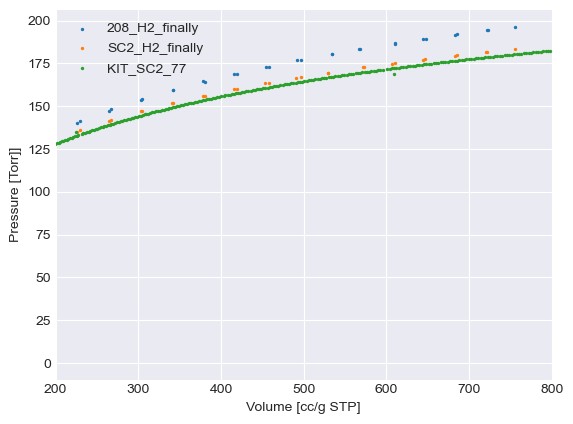

In [356]:
#plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V2_H2_77K_65p__iq_phisy_st2_2024_05_16_18_09_29 (Isotherm).csv',"208_H2orN2_druck_leer")   
#plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V2_H2_77K_65p__iq_phisy_st1_2024_05_16_18_09_29 (Isotherm).csv',"SC2_H2orN2_druck_leer") 
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_77K_Cryo_MD__iq_phisy_st2_2024_05_24_15_54_28 (Isotherm).csv',"208_H2_finally") 
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_77K_Cryo_MD__iq_phisy_st1_2024_05_24_15_54_28 (Isotherm).csv',"SC2_H2_finally") 
 
plot_isotherm('/Users/nick/Documents/Messdaten BA/KIT 77K.csv',"KIT_SC2_77",False) 
plt.xlim(200,800)

(200.0, 800.0)

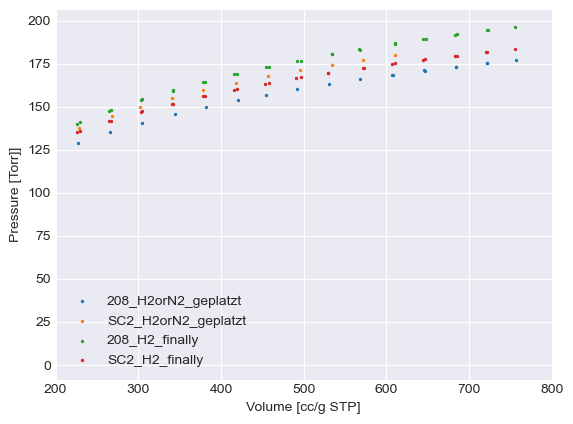

In [357]:
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V2_H2_77K_65p__iq_phisy_st2_2024_05_14_14_33_14 (Absolute Isotherm).csv',"208_H2orN2_geplatzt",False)  
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V2_H2_77K_65p__iq_phisy_st1_2024_05_14_14_33_13 (Absolute Isotherm).csv',"SC2_H2orN2_geplatzt",False)
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_77K_Cryo_MD__iq_phisy_st2_2024_05_24_15_54_28 (Isotherm).csv',"208_H2_finally") 
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_77K_Cryo_MD__iq_phisy_st1_2024_05_24_15_54_28 (Isotherm).csv',"SC2_H2_finally") 
 

plt.xlim(200,800)

(0.0, 200.0)

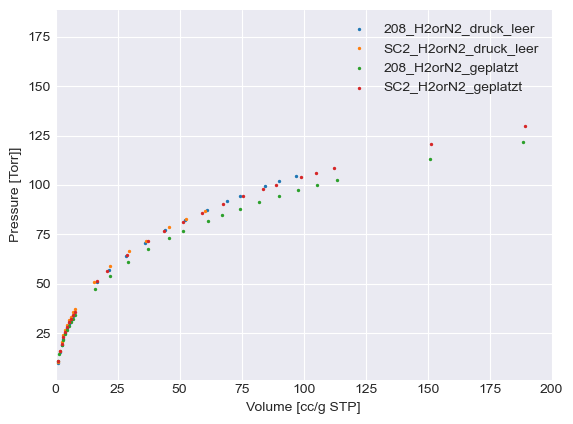

In [358]:
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V2_H2_77K_65p__iq_phisy_st2_2024_05_16_18_09_29 (Isotherm).csv',"208_H2orN2_druck_leer")   
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V2_H2_77K_65p__iq_phisy_st1_2024_05_16_18_09_29 (Isotherm).csv',"SC2_H2orN2_druck_leer") 

plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V2_H2_77K_65p__iq_phisy_st2_2024_05_14_14_33_14 (Absolute Isotherm).csv',"208_H2orN2_geplatzt",False)  
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V2_H2_77K_65p__iq_phisy_st1_2024_05_14_14_33_13 (Absolute Isotherm).csv',"SC2_H2orN2_geplatzt",False) 

plt.xlim(0,200)


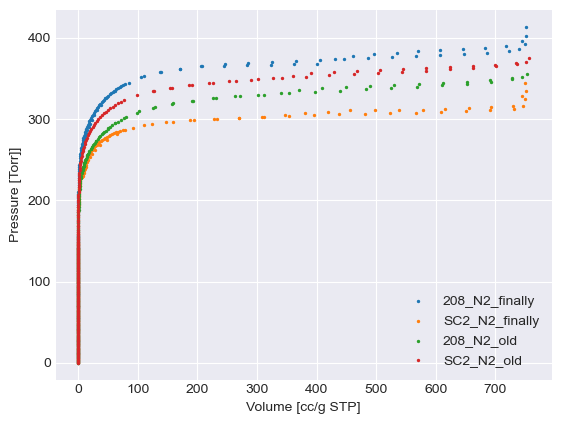

In [359]:
plot_isotherm('/Users/nick/Documents/Messdaten BA/ERM_FD107_N2_77K_VectorDose__iq_phisy_st2_2024_05_17_13_45_39 (Isotherm).csv',"208_N2_finally") 
plot_isotherm('/Users/nick/Documents/Messdaten BA/BAM_P109_N2_77K_VectorDose__iq_phisy_st1_2024_05_17_13_45_39 (Isotherm).csv',"SC2_N2_finally") 
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208C_N2_77K_VectorDose__iq_phisy_st1_2024_04_18_16_00_49 (Isotherm).csv',"208_N2_old") 
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ_SC2_N277K_VectorDose__iq_phisy_st2_2024_04_18_16_00_49 (Isotherm).csv',"SC2_N2_old")

Text(0.5, 1.0, 'Probe 1')

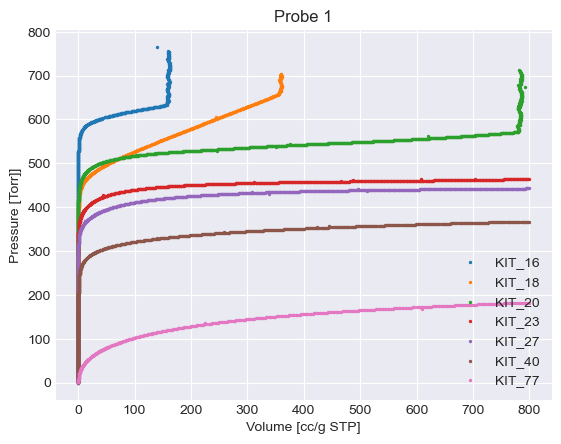

In [360]:
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_16",False,0,1)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_18",False,2,3)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_20",False,4,5)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_23",False,6,7)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_27",False,8,9)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_40",False,10,11)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_77",False,12,13)

plt.title("Probe 1")

Text(0.5, 1.0, 'Probe 2')

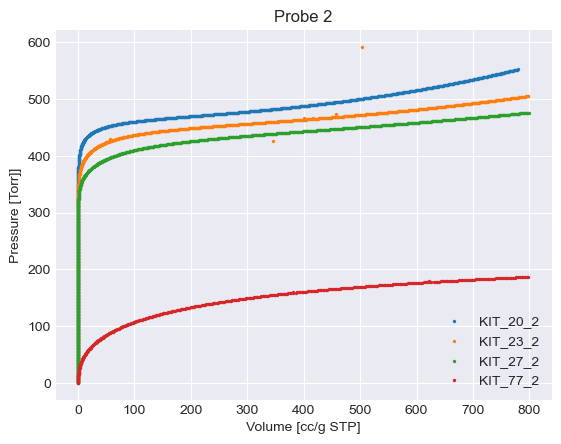

In [361]:
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_G-Table 1.csv',"KIT_20_2",False,0,1)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_G-Table 1.csv',"KIT_23_2",False,2,3)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_G-Table 1.csv',"KIT_27_2",False,4,5)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_G-Table 1.csv',"KIT_77_2",False,6,7)

plt.title("Probe 2")

Text(0.5, 1.0, 'Probe 1 und 2')

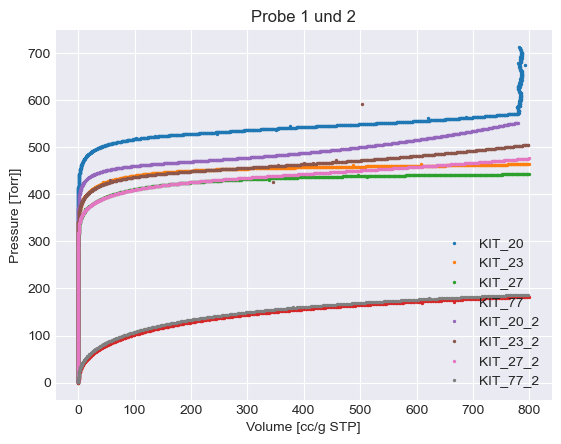

In [362]:

plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_20",False,4,5)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_23",False,6,7)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_27",False,8,9)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_77",False,12,13)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_G-Table 1.csv',"KIT_20_2",False,0,1)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_G-Table 1.csv',"KIT_23_2",False,2,3)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_G-Table 1.csv',"KIT_27_2",False,4,5)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_G-Table 1.csv',"KIT_77_2",False,6,7)

plt.title("Probe 1 und 2")


Text(0.5, 1.0, 'Probe 1 cleaned')

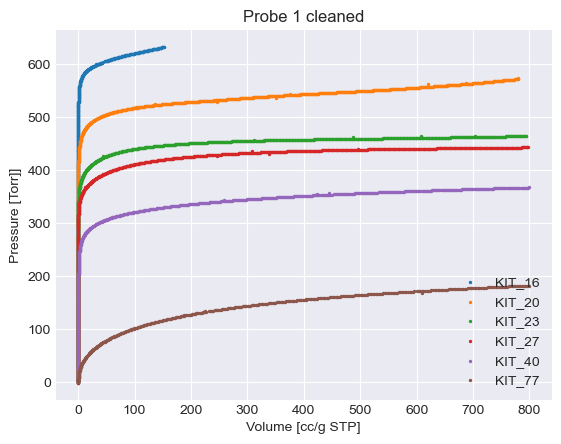

In [363]:

plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_16",False,0,1,865)

plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_20",False,4,5,1266)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_23",False,6,7,1113)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_27",False,8,9,1042)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_40",False,10,11,820)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_77",False,12,13,445)

plt.title("Probe 1 cleaned")


In [364]:
def load_data(file,T,h,k,f=10000):
    df = pd.read_csv(file)
    pressure = df.iloc[:, h].to_numpy()[:f]
  
    volume = df.iloc[:, k].to_numpy()[:f]
    temperature=np.ones(pressure.shape)*T

    result = [[x, y, z] for x, y, z in zip(temperature,pressure,volume)]
   
    return result
    
data=[]
data.append(load_data('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',16,0,1,865))
data.append(load_data('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',20,4,5,1266))
data.append(load_data('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',23,6,7,1113))
data.append(load_data('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',27,8,9,1042))
data.append(load_data('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',40,10,11,816))
data.append(load_data('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',77,12,13,441))

data=[element for sublist in data for element in sublist]

print(data)

[[16.0, 0.332497427925185, -0.632933110916562], [16.0, 0.3317087941734, 0.223682997993338], [16.0, 0.326640084731778, 1.08355487311888], [16.0, 0.32876223944976, 1.93795765341172], [16.0, 0.325990050854489, 2.79608204108599], [16.0, 0.327427156889187, 3.66503918158358], [16.0, 0.325340257059469, 4.53667570348055], [16.0, 0.326742677366387, 5.39162588609683], [16.0, 0.320011346085271, 6.25276144549184], [16.0, 0.317726221770829, 7.12455209724519], [16.0, 0.315988199788945, 7.98188488565021], [16.0, 0.324041087917043, 8.83177950406409], [16.0, 0.325716491253645, 9.68652459223302], [16.0, 0.325613908158038, 10.5426135286943], [16.0, 0.329995260154852, 11.4093364408031], [16.0, 0.320318534074922, 12.2727071023479], [16.0, 0.323494375966343, 13.1263110146352], [16.0, 0.332394581571668, 13.9755611959504], [16.0, 0.328248688583412, 14.8347253184741], [16.0, 0.326674282171176, 15.7059779514645], [16.0, 0.325990050854489, 16.5625092672017], [16.0, 0.321888791235695, 17.4216478631353], [16.0, 0.

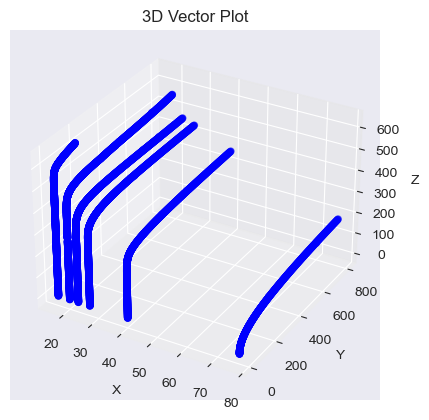

In [365]:

from mpl_toolkits.mplot3d import Axes3D



# Extract X, Y, Z coordinates
x_coords = [vec[0] for vec in data]

y_coords = [vec[1] for vec in data]
z_coords = [vec[2] for vec in data]

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title
ax.set_title('3D Vector Plot')


# Show the plot
plt.show()


In [366]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
"""
# Sample data: replace with your actual data
X = x_coords
Y = y_coords
Z = z_coords

# Define your custom function
# For example, a function of the form z = a*x + b*y + c*x*y + d
def custom_func(XY, a, b, c, d,e):
    T, p = XY
    T=np.array(T)
    p=np.array(p)
    R=8.314
    rho=[]
    for t,i in zip(T,p):
        rho.append(PropsSI("Dmolar", "P", i/750*101325, "T", t, "Hydrogen")) 
    rho=np.float64(rho)       
    return a * np.exp(-1 * (R * T / (b + c * T))**2 * np.log(d / p)**2) - e * rho


# Prepare the input data
XY = np.vstack((X, Y))

# Fit the custom function to the data
popt, pcov = curve_fit(custom_func, XY, Z)




# Plot the points and the fitted surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, color='r', label='Data points')

# Create a grid for plotting the surface
x_range = np.linspace(min(X), max(X), 50)
y_range = np.linspace(min(Y), max(Y), 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
Z_grid = custom_func((X_grid, Y_grid), *popt)

# Plot the surface
ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, rstride=100, cstride=100, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
print(popt)
"""

'\n# Sample data: replace with your actual data\nX = x_coords\nY = y_coords\nZ = z_coords\n\n# Define your custom function\n# For example, a function of the form z = a*x + b*y + c*x*y + d\ndef custom_func(XY, a, b, c, d,e):\n    T, p = XY\n    T=np.array(T)\n    p=np.array(p)\n    R=8.314\n    rho=[]\n    for t,i in zip(T,p):\n        rho.append(PropsSI("Dmolar", "P", i/750*101325, "T", t, "Hydrogen")) \n    rho=np.float64(rho)       \n    return a * np.exp(-1 * (R * T / (b + c * T))**2 * np.log(d / p)**2) - e * rho\n\n\n# Prepare the input data\nXY = np.vstack((X, Y))\n\n# Fit the custom function to the data\npopt, pcov = curve_fit(custom_func, XY, Z)\n\n\n\n\n# Plot the points and the fitted surface\nfig = plt.figure()\nax = fig.add_subplot(111, projection=\'3d\')\nax.scatter(X, Y, Z, color=\'r\', label=\'Data points\')\n\n# Create a grid for plotting the surface\nx_range = np.linspace(min(X), max(X), 50)\ny_range = np.linspace(min(Y), max(Y), 50)\nX_grid, Y_grid = np.meshgrid(x_rang

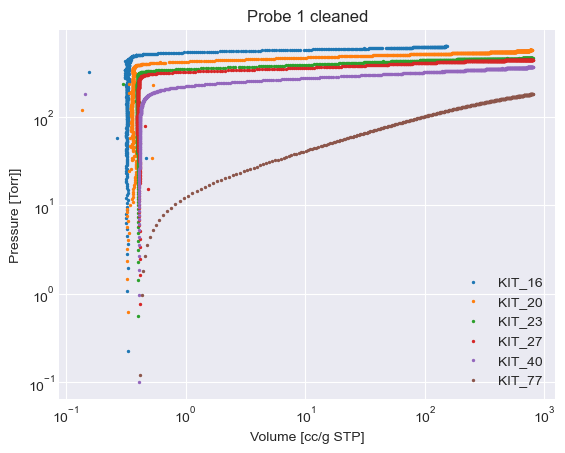

In [367]:

plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_16",False,0,1,865)

plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_20",False,4,5,1266)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_23",False,6,7,1113)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_27",False,8,9,1042)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_40",False,10,11,820)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_77",False,12,13,445)

plt.title("Probe 1 cleaned")
plt.yscale('log')
plt.xscale('log')

Optimized Parameters:
nmax: 20.625367228942405
a: 3479.3129883881193
b: 10.99227627915773
p0: 422537.6527418545
Va: 0.004242060663143019


/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/975554885.py:9: RuntimeWarning: invalid value encountered in log
  return nmax * np.exp(-1 * (R * T / (a + b * T))**2 * np.log(p0 / x)**2) - Va * rho


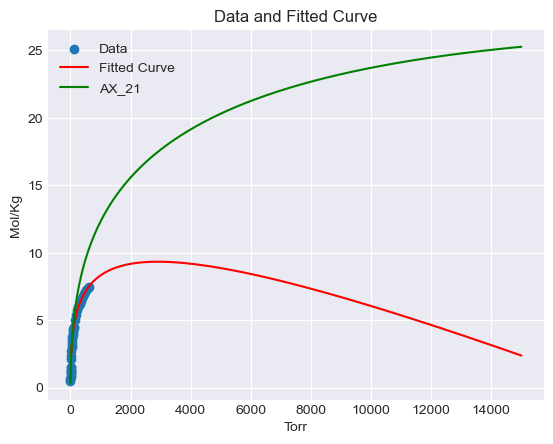

In [368]:
import numpy as np
from scipy.optimize import curve_fit

def custom_formula(x, nmax, a, b, p0,Va):
    R=8.314
    T=77.35
    
    rho=PropsSI("Dmolar", "P", x/750*101325, "T", T, "Hydrogen") #TODO: Selbe Diskussion wie bei fit...
    return nmax * np.exp(-1 * (R * T / (a + b * T))**2 * np.log(p0 / x)**2) - Va * rho

volume_SC2_sc=volume_SC2*rho_molar/1000 # cc/g zu mol/kg

params, covariance = curve_fit(custom_formula, pressure_SC2, volume_SC2_sc)
# Retrieve optimized parameters
nmax_opt, a_opt, b_opt, p0_opt,Va_opt = params

print("Optimized Parameters:")
print("nmax:", nmax_opt)
print("a:", a_opt)
print("b:", b_opt)
print("p0:", p0_opt)
print("Va:", Va_opt)
# Plot the data
plt.scatter(pressure_SC2, volume_SC2_sc, label='Data')

# Generate x values for the fitted curve
x_fit = np.linspace(min(pressure_SC2), 750*20, 1000)

# Calculate y values for the fitted curve using optimized parameters
y_fit = custom_formula(x_fit, *params)
y_nex = custom_formula(x_fit,nmax=71.6,p0=11025911.4,a=3080,b=18.9,Va=0.00143)
# Plot the fitted curve
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.plot(x_fit, y_nex, color='green', label='AX_21')


# Add labels and legend
plt.xlabel('Torr')
plt.ylabel('Mol/Kg')
plt.title('Data and Fitted Curve')
plt.legend()

# Show plot

plt.show()

/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/975554885.py:9: RuntimeWarning: invalid value encountered in log
  return nmax * np.exp(-1 * (R * T / (a + b * T))**2 * np.log(p0 / x)**2) - Va * rho


Optimized constrained Parameters:
nmax: 14.187469679663064
a: -12641.49802042727
b: 112.07019656802856
p0: 82665.46072633132
Va: 0.0003059636490184122


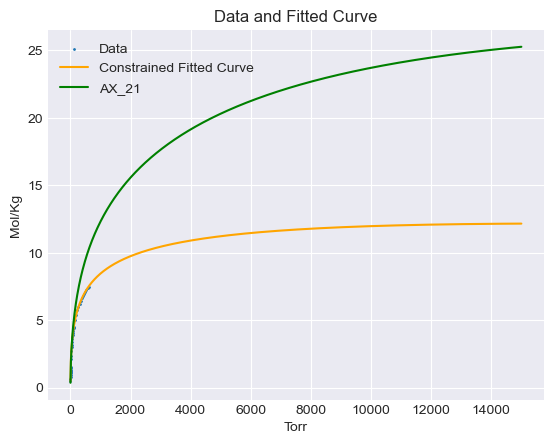

In [369]:
pressure_SC2_=np.append(pressure_SC2,600000) #constrain!!

volume_SC2_sc_=np.append(volume_SC2_sc,0)

# Perform curve fitting
params_cons, covariance_cons = curve_fit(custom_formula, pressure_SC2_, volume_SC2_sc_)
nmax_opt, a_opt, b_opt, p0_opt,Va_opt = params_cons

print("Optimized constrained Parameters:")
print("nmax:", nmax_opt)
print("a:", a_opt)
print("b:", b_opt)
print("p0:", p0_opt)
print("Va:", Va_opt)
# Plot the data

plt.scatter(pressure_SC2, volume_SC2_sc, label='Data',s=1)

# Generate x values for the fitted curve
x_fit_cons = np.linspace(min(pressure_SC2_), 20*750, 1000)

# Calculate y values for the fitted curve using optimized parameters
y_fit_cons = custom_formula(x_fit_cons, *params_cons)

# Plot the fitted curve

#plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.plot(x_fit_cons, y_fit_cons, color='orange', label='Constrained Fitted Curve')
plt.plot(x_fit, y_nex, color='green', label='AX_21')





# Add labels and legend
plt.xlabel('Torr')
plt.ylabel('Mol/Kg')
plt.title('Data and Fitted Curve')
plt.legend(loc="upper left")

# Show plot

plt.show()



/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/975554885.py:9: RuntimeWarning: invalid value encountered in log
  return nmax * np.exp(-1 * (R * T / (a + b * T))**2 * np.log(p0 / x)**2) - Va * rho


Optimized constrained Parameters:
nmax: 14.187479938134953
a: 2728.0663676761865
b: 16.093124925721987
p0: 82665.81342074045
Va: 0.0003059640260807756


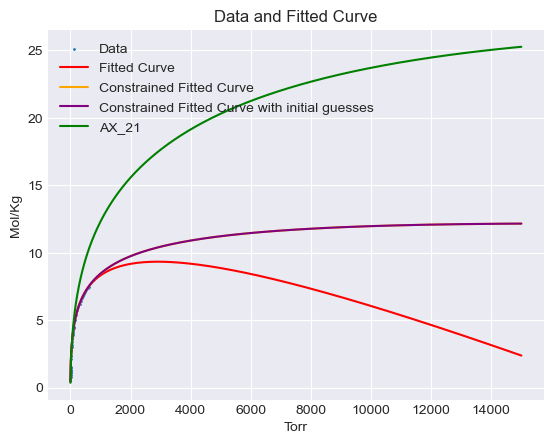

In [370]:
pressure_SC2_=np.append(pressure_SC2,600000) #constrain!!

volume_SC2_sc_=np.append(volume_SC2_sc,0)

# Perform curve fitting
#bounds=([0, 0, 0,0,0], [1000, 100000000, 10000,100000,10])
params_cons_p0, covariance_cons_p0 = curve_fit(custom_formula, pressure_SC2_, volume_SC2_sc_,p0=[71.6,3080,18.9,11025911.4,0.00143])
nmax_opt, a_opt, b_opt, p0_opt,Va_opt = params_cons_p0

print("Optimized constrained Parameters:")
print("nmax:", nmax_opt)
print("a:", a_opt)
print("b:", b_opt)
print("p0:", p0_opt)
print("Va:", Va_opt)
# Plot the data

plt.scatter(pressure_SC2, volume_SC2_sc, label='Data',s=1)


# Calculate y values for the fitted curve using optimized parameters
y_fit_cons_p0 = custom_formula(x_fit_cons, *params_cons_p0)

# Plot the fitted curve
rho_molar=PropsSI("DMOLAR", "P", 101325, "T", 293.15, "Hydrogen")
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.plot(x_fit_cons, y_fit_cons, color='orange', label='Constrained Fitted Curve')
plt.plot(x_fit_cons, y_fit_cons_p0, color='purple', label='Constrained Fitted Curve with initial guesses')
plt.plot(x_fit, y_nex, color='green', label='AX_21')





# Add labels and legend
plt.xlabel('Torr')
plt.ylabel('Mol/Kg')
plt.title('Data and Fitted Curve')
plt.legend(loc="upper left")

# Show plot

plt.show()



Important result: purple and orange curve are the same!!, but a and b differ significantly (a negative for no initial guess). Va, p0, nmax stay exactly the same. a+b*T is the formula. So for T=77.35 a1+b1*T=a2+b2*T. This part can become very interesting when it comes to T dependencies!!


Idea: fit -1 * (R * T / (a + b * T))**2 as a const for every isotherm itself. Then fit the const as a function of T over the obtained values.




In [371]:

def load_data_sep(file,h=0,k=1,f=10000,relative = True):
    df = pd.read_csv(file)
    l=1
    if relative: l=760
    pressure = df.iloc[:, h].to_numpy()[:f]*l
    volume = df.iloc[:, k].to_numpy()[:f]
    return pressure,volume


In [372]:
pressure_16,volume_16=load_data_sep('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',0,1,865,False)
pressure_20,volume_20=load_data_sep('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',4,5,1266,False)
pressure_23,volume_23=load_data_sep('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',6,7,1113,False)
pressure_27,volume_27=load_data_sep('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',8,9,1042,False)
pressure_40,volume_40=load_data_sep('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',10,11,816,False)
pressure_77,volume_77=load_data_sep('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',12,13,441,False)

pressure_40_KIT,volume_40_KIT=pressure_40,volume_40

/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/975554885.py:9: RuntimeWarning: invalid value encountered in log
  return nmax * np.exp(-1 * (R * T / (a + b * T))**2 * np.log(p0 / x)**2) - Va * rho


Optimized Parameters:
nmax: 10.837146222398358
a: 2467.7333271386174
b: 11.253006853436077
p0: 12694.55563408905
Va: 0.0001491975993859381
Optimized Parameters:
nmax: 18.38840994469417
a: 5567.931106239327
b: 49.31246945826915
p0: 128614.66844908435
Va: 0.0004341053465608137
Optimized Parameters:
nmax: 19.706558720971938
a: 4007.561544442421
b: 37.29807396726186
p0: 1390.3633347150765
Va: 0.0003408289103414883
Optimized Parameters:
nmax: 20.46251693076474
a: 4928.580733058974
b: 15.795500130778633
p0: 515.6337413907145
Va: 0.0002820105794419684
Optimized Parameters:
nmax: 24.523135930470765
a: 3627.073012295056
b: 33.25522279332651
p0: 647.5457329826253
Va: 0.00034999299091939513
Optimized Parameters:
nmax: 28.293119851920668
a: 3761.9236297545217
b: 0.5751565615441407
p0: 31.353783643681272
Va: 4.1554821624460066e-05


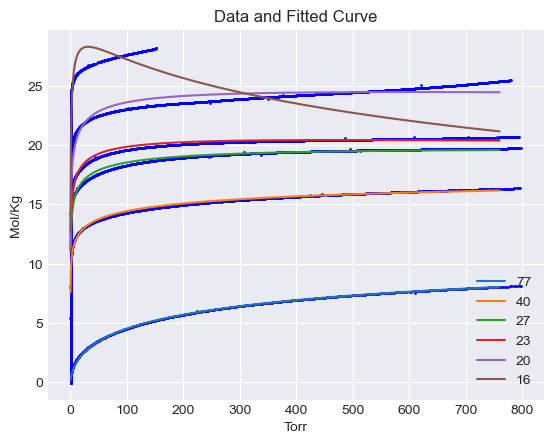

In [373]:




def fit_KIT(pressure,volume):

    
    rho_molar=PropsSI("DMOLAR", "P", 101325, "T", 273.15, "Hydrogen")

    # Perform curve fitting
    volume_=volume*rho_molar/1000 # cc/g zu mol/kg
    plt.scatter(pressure, volume_, color="blue",s=1)
    pressure=np.append(pressure,600000) #constrain!!

    volume_=np.append(volume_,0)

    params, covariance = curve_fit(custom_formula, pressure[200:], volume_[200:],p0=[71.6,3080,18.9,11025911.4,0.00143])
    # Retrieve optimized parameters
    nmax_opt, a_opt, b_opt, p0_opt,Va_opt = params

    print("Optimized Parameters:")
    print("nmax:", nmax_opt)
    print("a:", a_opt)
    print("b:", b_opt)
    print("p0:", p0_opt)
    print("Va:", Va_opt)
    # Plot the data
    # Plot the data

    

    # Generate x values for the fitted curve
    x_fit_cons = np.linspace(min(pressure), 1*760, 1000)

    # Calculate y values for the fitted curve using optimized parameters
    y_fit_cons = custom_formula(x_fit_cons, *params)
    # Plot the fitted curve

    plt.plot(x_fit_cons, y_fit_cons,label=f"{T}")
    # Add labels and legend
    plt.xlabel('Torr')
    plt.ylabel('Mol/Kg')
    plt.title('Data and Fitted Curve')
    plt.legend()
    return params
params=[]
T=77
params.append(fit_KIT(pressure_77, volume_77))    
T=40

params.append(fit_KIT(pressure_40, volume_40)) 

T=27
params.append(fit_KIT(pressure_27, volume_27))    
T=23
params.append(fit_KIT(pressure_23, volume_23))    
T=20
params.append(fit_KIT(pressure_20, volume_20) )   
T=16
params.append(fit_KIT(pressure_16, volume_16) )      

Text(0.5, 1.0, 'Non Ideality Correction for Hydrogen at 77.35K')

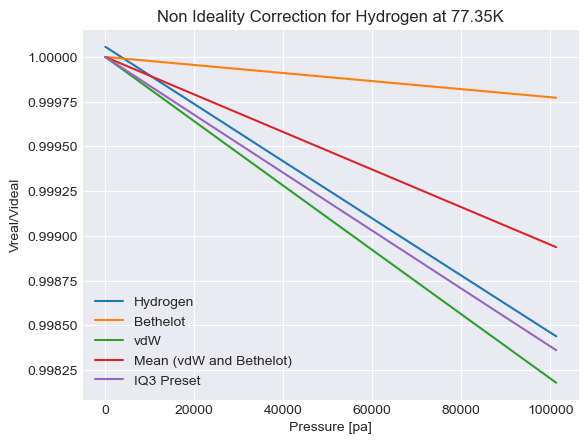

In [374]:


T=77.35
a=2.16e-6*1/133.322
abet=0.03E-5/133.322
avdW=0.24E-5/133.322
amean=0.14E-5/133.322

p=np.linspace(1,101325,1000)
D=PropsSI("Dmolar", "P", p, "T", T, "Hydrogen")
#D2=D=PropsSI("Dmolar", "P", p, "T", T, "Nitrogen")
Y=p/(D*8.314*T)

Yiq3=1/(1+a*p)
Ybet=1/(1+abet*p)
YvdW=1/(1+avdW*p)
Ymean=1/(1+amean*p)
#Y2=p*1/(D2*8.314*T)
plt.plot(p,Y,label="Hydrogen")
plt.plot(p,Ybet,label=f"Bethelot")
plt.plot(p,YvdW,label=f"vdW")
plt.plot(p,Ymean,label=f"Mean (vdW and Bethelot)")
plt.plot(p,Yiq3,label=f"IQ3 Preset")
plt.legend()
plt.xlabel("Pressure [pa]")
plt.ylabel("Vreal/Videal")
plt.title("Non Ideality Correction for Hydrogen at 77.35K")


[0.99998411 0.99998411 0.99998409 0.99998409 0.99998409 0.99998409
 0.99998409 0.99998408 0.99998408 0.99998408 0.99998407 0.99998407
 0.99998407 0.99998406 0.99998406 0.99998406 0.99998405 0.99998405
 0.99998404 0.99998404 0.99998404 0.99998403 0.99998403 0.99998402
 0.99998402 0.99998402 0.99998401 0.99998401 0.99998401 0.999984
 0.999984   0.99998399 0.99998399 0.99998399 0.99998398 0.99998398
 0.99998398 0.99998397 0.99998397 0.99998397 0.99998396 0.99998396
 0.99998396 0.99998395 0.99998395 0.99998395 0.99998395 0.99998394
 0.99998394 0.99998394 0.99998394 0.99998394 0.99998393 0.99998393
 0.99998393 0.99998393 0.99998393 0.99998392 0.99998392 0.99998392
 0.99998392 0.99998392 0.99998392 0.99998392 0.99998391 0.99998391
 0.99998391 0.99998391 0.99998391 0.9999839  0.9999839  0.9999839
 0.9999839  0.9999839  0.9999839  0.99998389 0.99998389 0.99998389
 0.99998389 0.99998389 0.99998388 0.99998388 0.99998388 0.99998388
 0.99998388 0.99998387 0.99998387 0.99998387 0.99998387 0.9999838

Text(0, 0.5, 'Mol/kg')

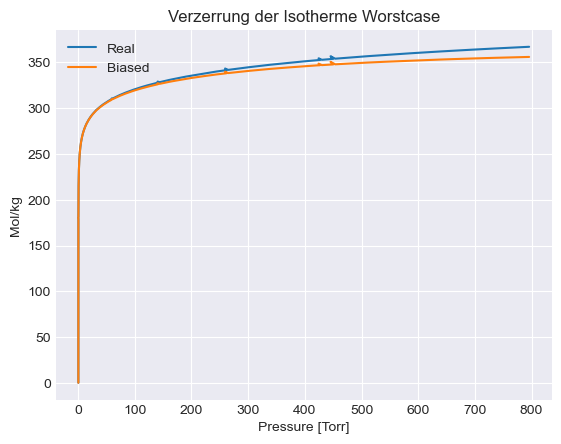

In [375]:
plt.title("Verzerrung der Isotherme Worstcase")
plt.plot(pressure_40,volume_40,label="Real")
amean_tr=1.87E-5
a_tr=1.50905884e-07*133.322
bias=1/((1+pressure_40*a_tr)*(1+pressure_40*amean_tr))
print(bias)
plt.plot(pressure_40,volume_40*bias,label="Biased")
plt.xlabel("Pressure [Torr]")
plt.legend()
plt.ylabel("Mol/kg")

[1.50905884e-07]


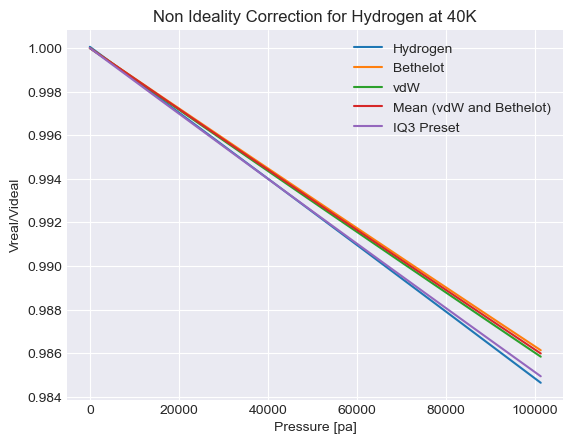

In [376]:
T=40
a=1.50905884e-07
abet=1.85E-5/133.322
avdW=1.89E-5/133.322
amean=1.87E-5/133.322

p=np.linspace(1,101325,1000)
D=PropsSI("Dmolar", "P", p, "T", T, "Hydrogen")

Y=p*1/(D*8.314*T)

Yiq3=1/(1+a*p)
Ybet=1/(1+abet*p)
YvdW=1/(1+avdW*p)
Ymean=1/(1+amean*p)
#Y2=p*1/(D2*8.314*T)
plt.plot(p,Y,label="Hydrogen")
plt.plot(p,Ybet,label=f"Bethelot")
plt.plot(p,YvdW,label=f"vdW")
plt.plot(p,Ymean,label=f"Mean (vdW and Bethelot)")
plt.plot(p,Yiq3,label=f"IQ3 Preset")
plt.legend()
plt.xlabel("Pressure [pa]")
plt.ylabel("Vreal/Videal")
plt.title(f"Non Ideality Correction for Hydrogen at {T}K")
def lin(x,a):
    return 1-x*a

params, covariance = curve_fit(lin, p, Y)
print(params)


Text(0.5, 1.0, 'SC2 Isotherme')

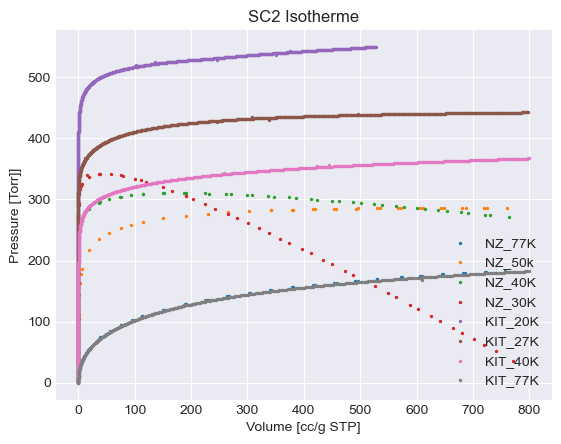

In [377]:

plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_77K_Cryo_MD__iq_phisy_st1_2024_05_24_15_54_28 (Isotherm).csv',"NZ_77K")

plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_50K_Cryo_MD__iq_phisy_st1_2024_05_27_11_43_37 (Absolute Isotherm).csv',"NZ_50k",False,0,1)

plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_40K_Cryo_MD__iq_phisy_st1_2024_05_28_19_16_15 (Absolute Isotherm).csv',"NZ_40K",False,0,1)

plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_30K_Cryo_MD__iq_phisy_st1_2024_05_28_08_08_31 (Absolute Isotherm).csv',"NZ_30K",False,0,1)



plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_20K",False,4,5,1042)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_27K",False,8,9,1042)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_40K",False,10,11,820)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_77K",False,12,13,445)

plt.title("SC2 Isotherme")

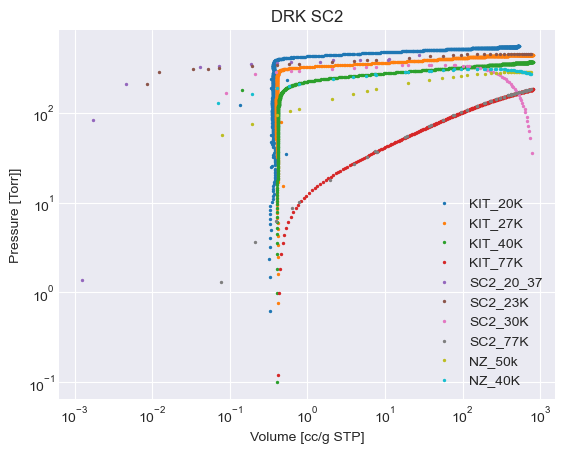

In [378]:


plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_20K",False,4,5,1042)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_27K",False,8,9,1042)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_40K",False,10,11,820)
plot_isotherm('/Users/nick/Documents/Messdaten BA/sum_H2/Sum_H2_B-Table 1.csv',"KIT_77K",False,12,13,445)


plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_20(Boil)K_Cryo_MD__iq_phisy_st1_2024_06_05_21_25_26 (Isotherm).csv',"SC2_20_37")


plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_23K_Cryo_MD__iq_phisy_st1_2024_06_05_10_54_05 (Isotherm).csv',"SC2_23K")


plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_30K_Cryo_MD__iq_phisy_st1_2024_05_28_08_08_31 (Isotherm).csv',"SC2_30K")


plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_77K_Cryo_MD__iq_phisy_st1_2024_05_24_15_54_28 (Isotherm).csv',"SC2_77K")

plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_50K_Cryo_MD__iq_phisy_st1_2024_05_27_11_43_37 (Absolute Isotherm).csv',"NZ_50k",False,0,1)

plot_isotherm('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_40K_Cryo_MD__iq_phisy_st1_2024_05_28_19_16_15 (Absolute Isotherm).csv',"NZ_40K",False,0,1)

plt.legend()
plt.title("DRK SC2")
plt.yscale('log')
plt.xscale('log') 

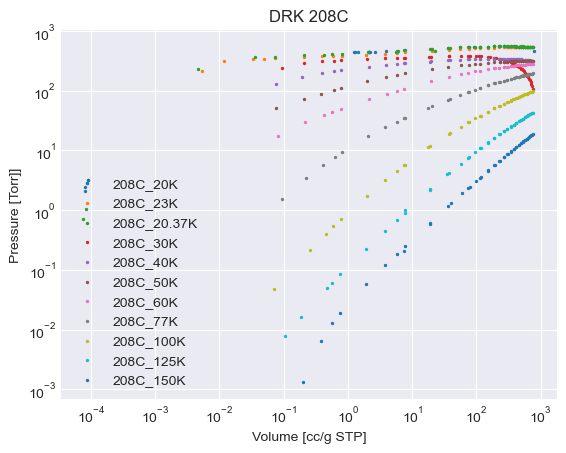

In [379]:


plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_20K_Cryo_MD__iq_phisy_st2_2024_06_04_19_05_56 (Isotherm).csv',"208C_20K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_23K_Cryo_MD__iq_phisy_st2_2024_06_05_10_54_05 (Isotherm).csv',"208C_23K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_20(Boil)K_Cryo_MD__iq_phisy_st2_2024_06_05_21_25_27 (Isotherm).csv',"208C_20.37K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_30K_Cryo_MD__iq_phisy_st2_2024_05_28_08_08_32 (Isotherm).csv',"208C_30K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_40K_Cryo_MD__iq_phisy_st2_2024_05_28_19_16_15 (Isotherm).csv',"208C_40K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_50K_Cryo_MD__iq_phisy_st2_2024_05_27_11_43_37 (Isotherm).csv',"208C_50K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_60K_Cryo_MD__iq_phisy_st2_2024_05_29_09_50_37 (Isotherm).csv',"208C_60K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_77K_Cryo_MD__iq_phisy_st2_2024_05_24_15_54_28 (Isotherm).csv',"208C_77K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_100K_Cryo_MD__iq_phisy_st2_2024_05_30_18_14_09 (Isotherm).csv',"208C_100K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_125K_Cryo_MD__iq_phisy_st2_2024_06_03_19_20_55 (Isotherm).csv',"208C_125K")
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_150K_Cryo_MD__iq_phisy_st2_2024_05_31_10_06_35 (Isotherm).csv',"208C_150K")
plt.title("DRK 208C")
plt.yscale('log')
plt.xscale('log') 



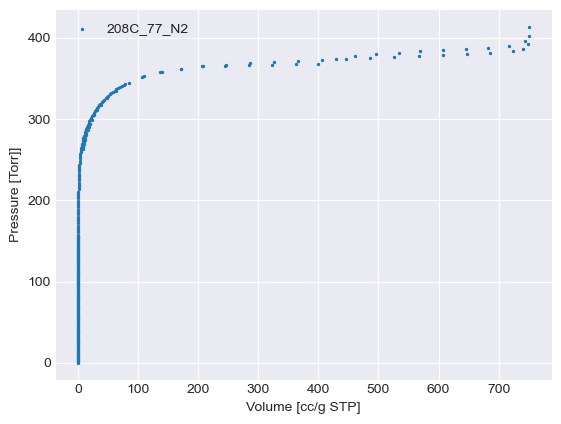

In [380]:
plot_isotherm('/Users/nick/Documents/Messdaten BA/ERM_FD107_N2_77K_VectorDose__iq_phisy_st2_2024_05_17_13_45_39 (Isotherm).csv',"208C_77_N2")

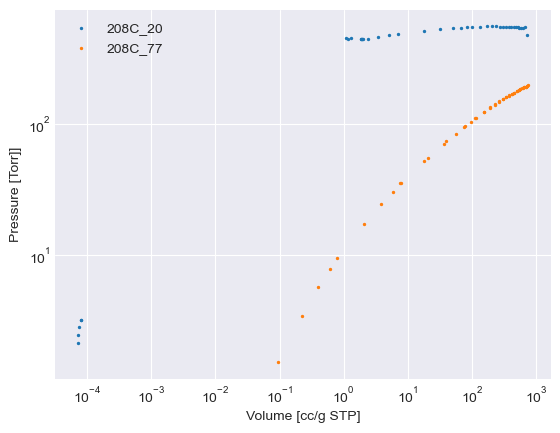

In [381]:
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_20K_Cryo_MD__iq_phisy_st2_2024_06_04_19_05_56 (Isotherm).csv',"208C_20",p0=680)
plot_isotherm('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_77K_Cryo_MD__iq_phisy_st2_2024_05_24_15_54_28 (Isotherm).csv',"208C_77",p0=760)
plt.yscale('log')
plt.xscale('log')

[5.94343209e-05]


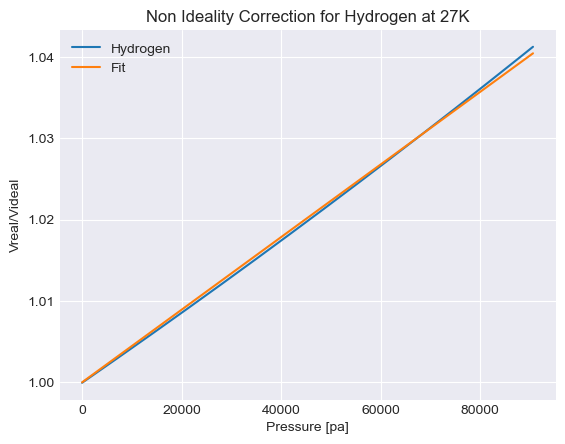

In [382]:

T=27


p=np.linspace(1,680/760*101325,1000)
D=PropsSI("Dmolar", "P", p, "T", T, "Hydrogen")

Y=(D*8.314*T)/p




plt.plot(p,Y,label="Hydrogen")


plt.xlabel("Pressure [pa]")
plt.ylabel("Vreal/Videal")
plt.title(f"Non Ideality Correction for Hydrogen at {T}K")
def lin(x,a):
    return (1+x*a)

params, covariance = curve_fit(lin, p, Y)
a=params

Y_fit=(1+a*p)

plt.plot(p,Y_fit,label="Fit")


print(params*133.322)
plt.legend()

In [383]:
print(PropsSI("Z", "P", 101325, "T", 30, "Hydrogen")-1)

-0.03368439557158287


[-4.31359835e-05 -1.16550565e-11]


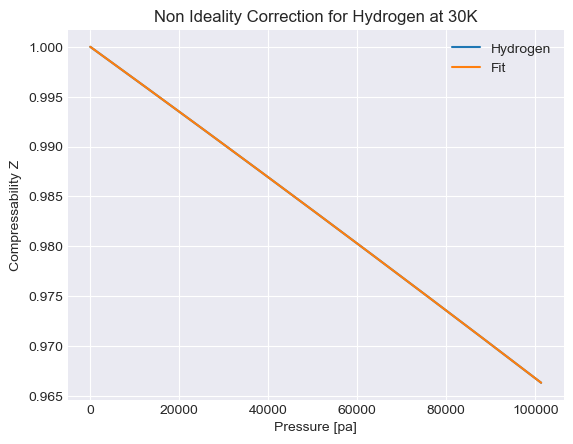

In [384]:

T=30



p=np.linspace(1,101325,1000)
Z=PropsSI("Z", "P", p, "T", T, "Hydrogen")






plt.plot(p,Z,label="Hydrogen")


plt.xlabel("Pressure [pa]")
plt.ylabel("Compressability Z")
plt.title(f"Non Ideality Correction for Hydrogen at {T}K")
def lin(x,a,b):
    return (1+x*a+x**2*b)

params, covariance = curve_fit(lin, p, Z)
a,b=params

Y_fit=(1+a*p+b*p**2)

plt.plot(p,Y_fit,label="Fit")

print(params*133.322)
plt.legend()

In [385]:
#10 mol ideales Gas bei 500 Torr und 77.35K
T_test=16
P_test=10

V_id=10*8.31446261815324*T_test/(P_test*133.322)
#print(V_id)
V_H2_corrected=V_id*PropsSI("Z", "P", P_test*133.322, "T", T_test, "Hydrogen")
V_H2_real=10/PropsSI("Dmolar", "P", P_test*133.322, "T", T_test, "Hydrogen")
#print(V_H2_corrected,V_H2_real)

#@STP
V_id_1=V_id*(P_test*273.15)/(T_test*760)*PropsSI("Z", "P", 760*133.322, "T", 273.15, "Hydrogen")
V_id_2=V_id*(P_test*273.15)/(T_test*760)
V_H2_corrected=V_H2_corrected*(P_test*273.15)/(T_test*760)
#V_H2_corrected_2=V_H2_real*(P_test*273.15)/(T_test*760)
V_H2_real=10/PropsSI("Dmolar", "P", 760*133.322, "T", 273.15, "Hydrogen")
print(V_H2_corrected,V_id_1,V_id_2,V_H2_real)

0.22369197729238147 0.22428015074808982 0.2241403148361582 0.2242804038206096


In [386]:
# Annahme: bei 77.35K und 500 Torr 1 mol H2 adsobiert so sollte das Ergebniss der Berechnungen sein: Vads(STP)=22414
Tw=300
Tk=30
pc=760
nads=0.0009601694696428572
Vm=20.5806
Vw=5.33903
Vk=6.06054

Zw=PropsSI("Z", "P", pc*133.322, "T", Tw, "Hydrogen")
Zk=PropsSI("Z", "P", pc*133.322, "T", Tk, "Hydrogen")
#Z=p/(Dmol*R*T)

R=8.31446*0.00750062*1e+6 


pm=R*Tw/Vm*(pc*(Vw+Vm)/(R*Tw*Zw)+pc*Vk/(R*Tk*Zk)+nads)


#### Bestimmung von Vads unter verschiedenen Annahmen
#1. Ideales Gas
nads=pm*Vm/(R*Tw)-pc*(Vm+Vw)/(R*Tw)-pc*Vk/(R*Tk)
print(nads)
#2. Non Ideality Korrektur für Kaltes Gas Z=1+ap V'=V*1/Z
nads=pm*Vm/(R*Tw)-pc*(Vm+Vw)/(R*Tw)-pc*Vk/(R*Tk)/Zk
print(nads)
#3. IQ3 Z=1-ap V'=V*Z
nads=pm*Vm/(R*Tw)-pc*(Vm+Vw)/(R*Tw)-pc*Vk/(R*Tk)*(2-Zk)
print(nads)


0.0010453647243596027
0.0009595462207978521
0.0009624369570097901


In [387]:
print(243.5764*0.0883/22400)

0.0009601694696428572


In [388]:
#Zur Umrechung der Isotherme mit 2 verschiedenen Z:
Zk=1-3.37e-2 #wahres Z
Zf=1 #falsches Z
nads=pm*Vm/(R*Tw)-pc*(Vm+Vw)/(R*Tw)-pc*Vk/(R*Tk)/Zk
print(nads)
nads=pm*Vm/(R*Tw)-pc*(Vm+Vw)/(R*Tw)-pc*Vk/(R*Tk)/Zf
print(nads)
print(nads+pc*Vk/(R*Tk)/Zf-pc*Vk/(R*Tk)/Zk) #Umrechnung: man brauch Tk,Zk,Zf,pc,Vk 
print(0.0009595048262130944/0.0010453647243596027-1)

0.0009595048262130944
0.0010453647243596027
0.0009595048262130944
-0.08213391570019413


-4.313598349000095e-05


Text(0, 0.5, 'V_ads=Mol/kg')

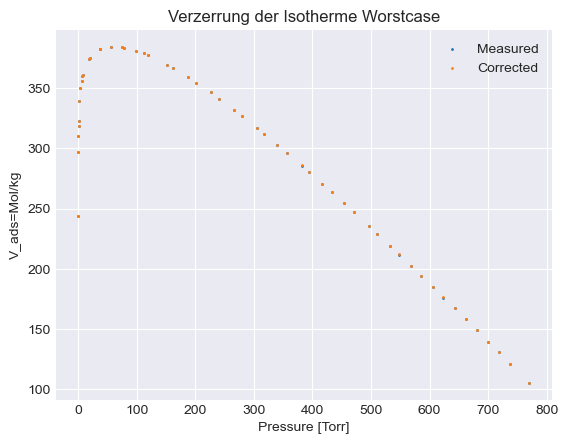

In [389]:
pressure_30,volume_30=load_data_sep('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_30K_Cryo_MD__iq_phisy_st2_2024_05_28_08_08_32 (Absolute Isotherm).csv',0,1,relative=False)
plt.title("Verzerrung der Isotherme Worstcase")
plt.scatter(pressure_30,volume_30,s=1,label="Measured")
amean_tr=4.47e-5
a_tr=a*133.322
print(a_tr)
bias=1/((1+pressure_30*a_tr)*(1+pressure_30*amean_tr))

plt.scatter(pressure_30,volume_30/bias,s=1,label="Corrected")
plt.xlabel("Pressure [Torr]")
plt.legend()
plt.ylabel("V_ads=Mol/kg")

In [390]:

def fit_NZ(pressure,volume,p0=[71.6,3080,18.9,11025911.4,0.00143],bounds=(-1000000000,1000000000)):

    
    rho_molar=PropsSI("DMOLAR", "P", 101325, "T", 273.15, "Hydrogen") 

    # Perform curve fitting
    volume_=volume*rho_molar/1000 # cc/g zu mol/kg
    plt.scatter(pressure, volume_, color="blue",s=1)
    

   

    params, covariance = curve_fit(custom_formula, pressure, volume_,p0=p0,bounds=bounds)
    # Retrieve optimized parameters
    nmax_opt, a_opt, b_opt, p0_opt,Va_opt = params

    print("Optimized Parameters:")
    print("nmax:", nmax_opt)
    print("a:", a_opt)
    print("b:", b_opt)
    print("p0:", p0_opt)
    print("Va:", Va_opt)
    # Plot the data
    # Plot the data

    

    # Generate x values for the fitted curve
    x_fit_cons = np.linspace(min(pressure), 1*760, 1000)

    # Calculate y values for the fitted curve using optimized parameters
    y_fit_cons = custom_formula(x_fit_cons, *params)
    # Plot the fitted curve

    plt.plot(x_fit_cons, y_fit_cons,label=f"{T}")
    # Add labels and legend
    plt.xlabel('Torr')
    plt.ylabel('Mol/Kg')
    plt.title('Data and Fitted Curve')
    plt.legend()
    return params

Optimized Parameters:
nmax: 21.456352586592207
a: -343.77468891308547
b: 58.05562580510443
p0: 266641.01815507445
Va: 0.00387436943231309
Optimized Parameters:
nmax: 14.33147766247089
a: 3811.6318285764723
b: 10.503255235518287
p0: 1268.2904299891147
Va: 1.2383937363290273e-05
Optimized Parameters:
nmax: 16.30072556794853
a: 3845.347788918336
b: 29.68662155753672
p0: 811.4644871274309
Va: 0.012951170406633824
Optimized Parameters:
nmax: 30.42381054858194
a: -315106.74909577286
b: 4271.783466741597
p0: 999999927.8273869
Va: 0.10154409605084987


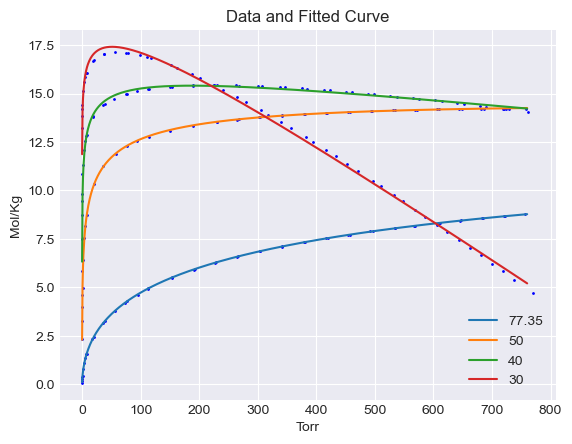

In [391]:


#208C:

pressure_77,volume_77=load_data_sep('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_77K_Cryo_MD__iq_phisy_st2_2024_05_24_15_54_28 (Isotherm).csv')
pressure_50,volume_50=load_data_sep('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_50K_Cryo_MD__iq_phisy_st2_2024_05_27_11_43_37 (Absolute Isotherm).csv',relative=False)
pressure_40,volume_40=load_data_sep('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_40K_Cryo_MD__iq_phisy_st2_2024_05_28_19_16_15 (Absolute Isotherm).csv',relative=False)
pressure_30,volume_30=load_data_sep('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_30K_Cryo_MD__iq_phisy_st2_2024_05_28_08_08_32 (Absolute Isotherm).csv',relative=False)



params=[]
T=77.35
params.append(fit_NZ(pressure_77, volume_77))    
T=50
params.append(fit_NZ(pressure_50, volume_50)) 
T=40
params.append(fit_NZ(pressure_40, volume_40)) 

T=30
params.append(fit_NZ(pressure_30, volume_30))    
   

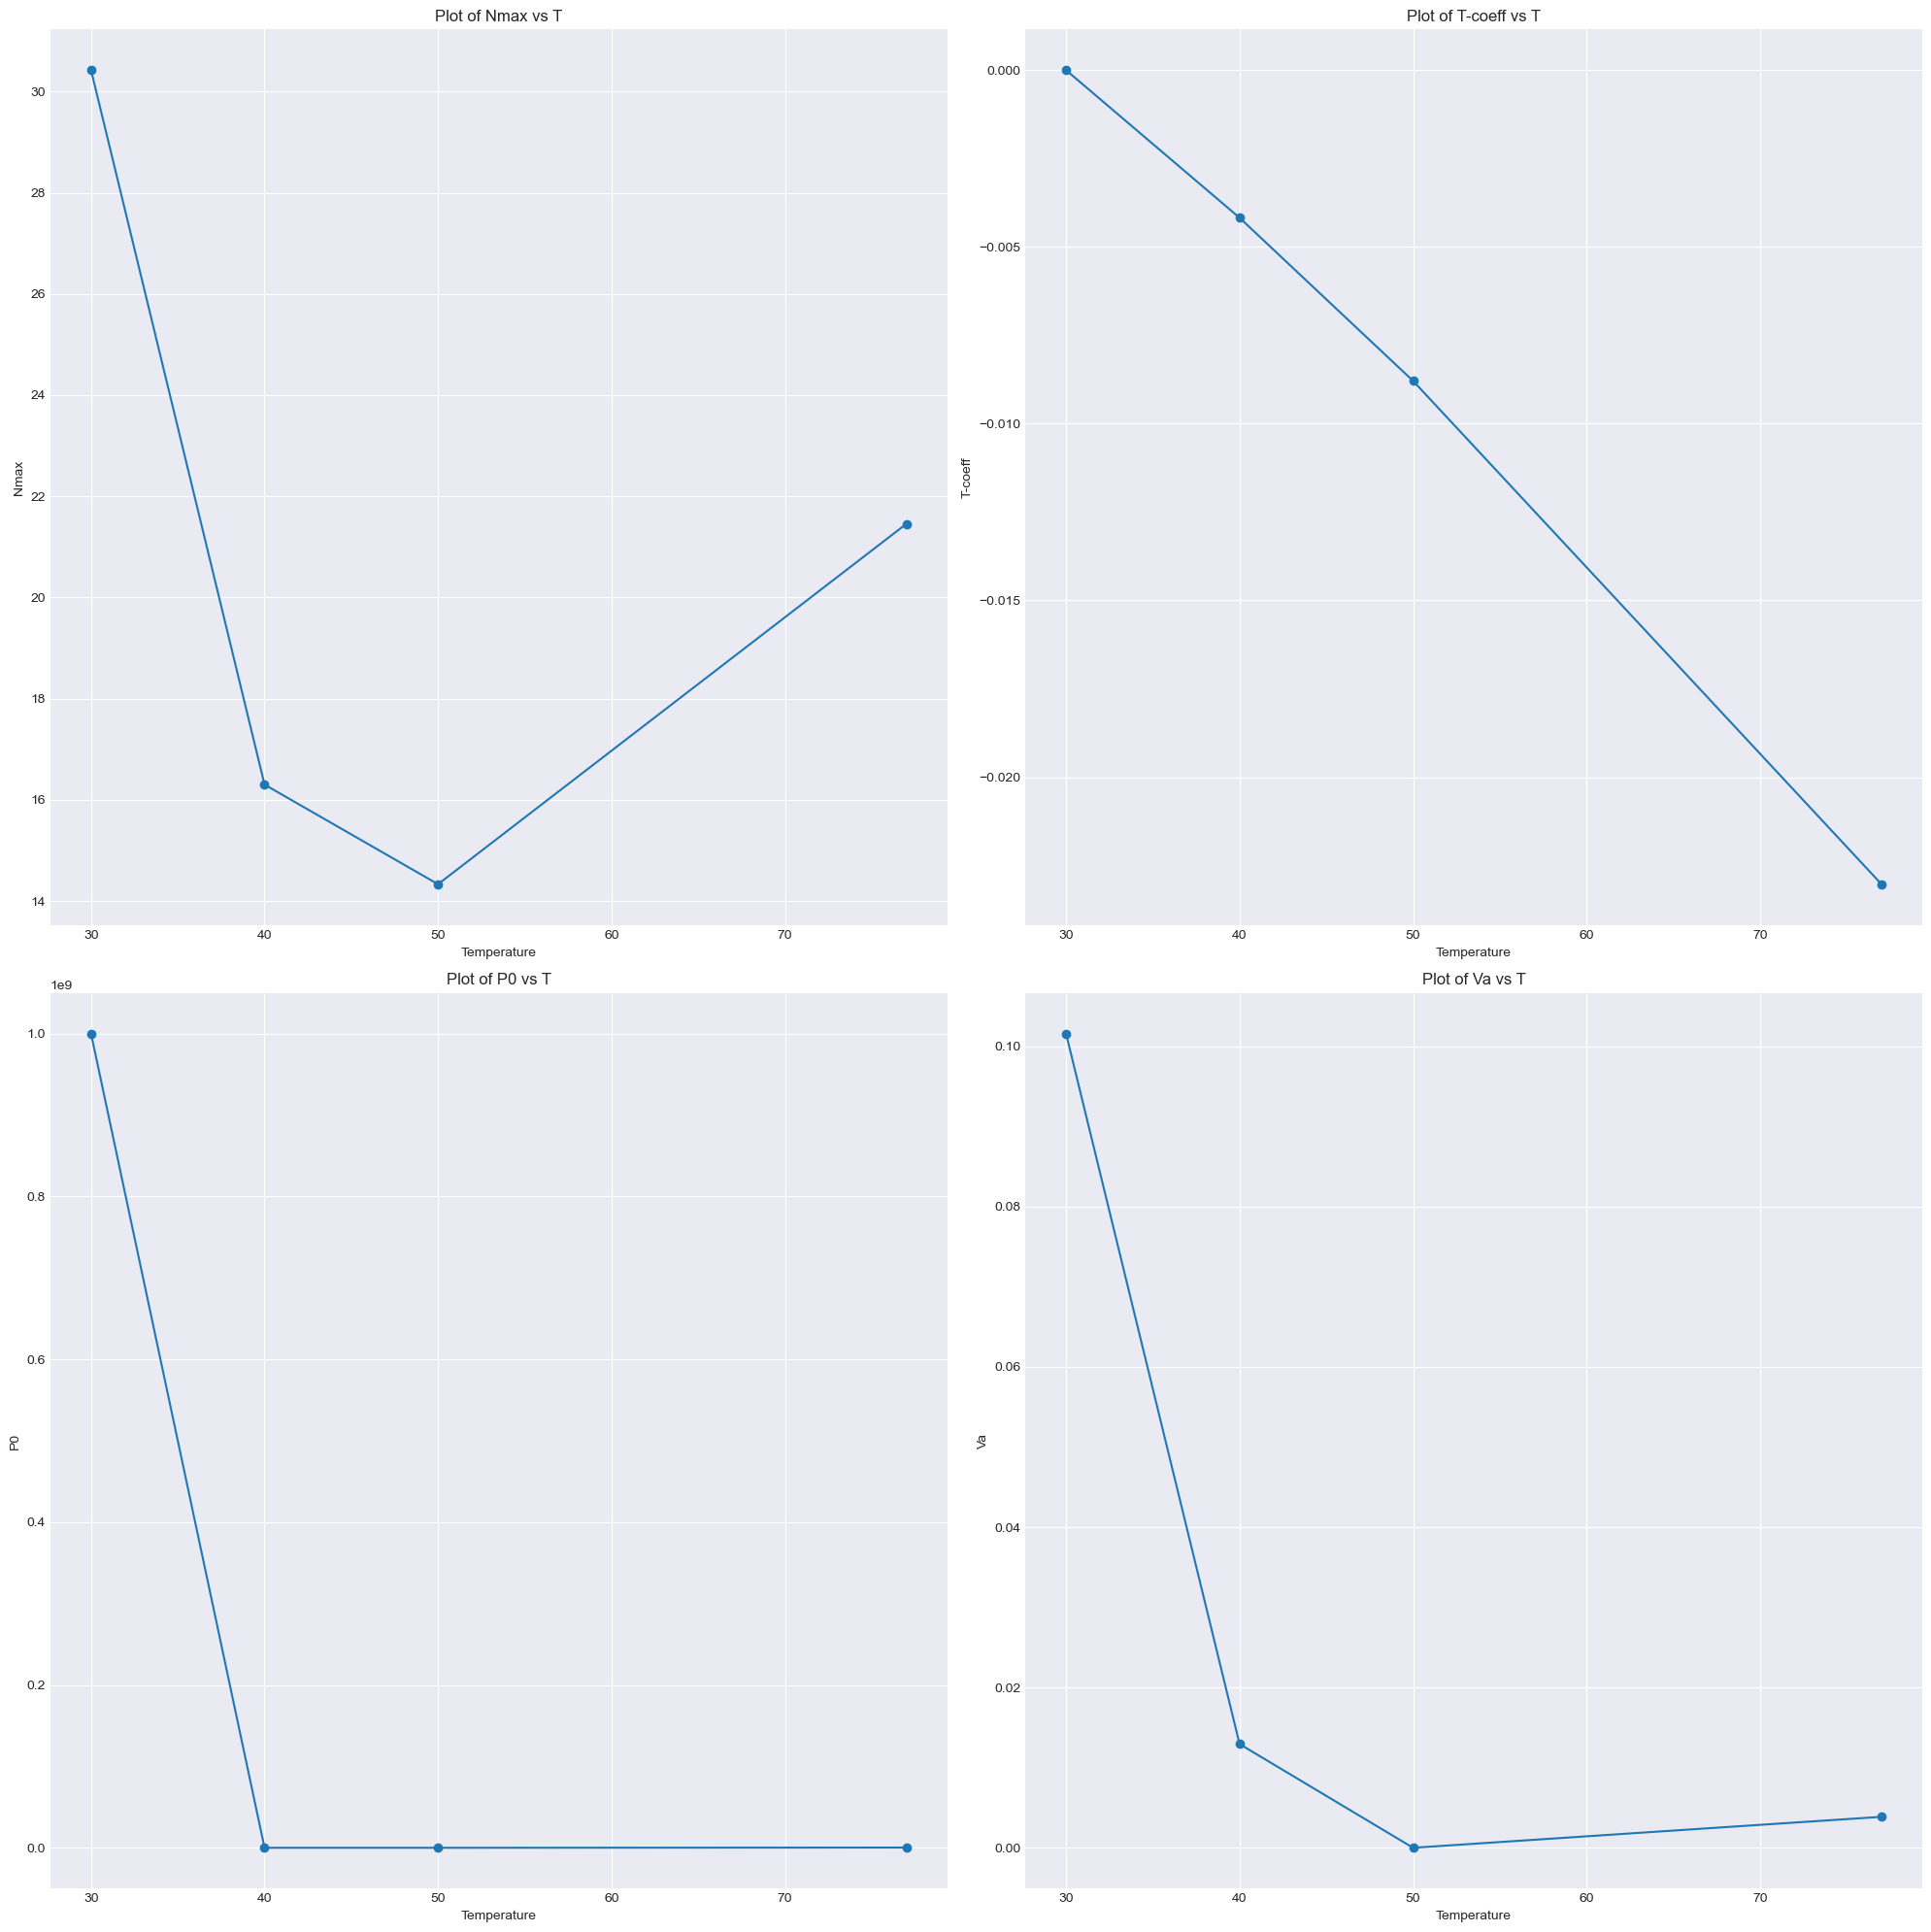

In [392]:
# Create a figure and subplots
T=np.array([77,50,40,30])
params=np.array(params)
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
i=0
j=0
axs[i][j].plot(T, params[:, 0], marker='o', linestyle='-')
axs[i][j].set_xlabel('Temperature')
axs[i][j].set_ylabel(f'Nmax')
axs[i][j].set_title(f'Plot of Nmax vs T')
axs[i][j].grid(True)
i=0
j=1
axs[i][j].plot(T, -1 * (8.132 * T / (params[:, 1] + params[:, 2] * T))**2, marker='o', linestyle='-')
axs[i][j].set_xlabel('Temperature')
axs[i][j].set_ylabel(f'T-coeff')
axs[i][j].set_title(f'Plot of T-coeff vs T')
axs[i][j].grid(True)
i=1
j=0
axs[i][j].plot(T, params[:, 3], marker='o', linestyle='-')
axs[i][j].set_xlabel('Temperature')
axs[i][j].set_ylabel(f'P0')
axs[i][j].set_title(f'Plot of P0 vs T')
axs[i][j].grid(True)
i=1
j=1
axs[i][j].plot(T, params[:, 4], marker='o', linestyle='-')
axs[i][j].set_xlabel('Temperature')
axs[i][j].set_ylabel(f'Va')
axs[i][j].set_title(f'Plot of Va vs T')
axs[i][j].grid(True)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [393]:

#SC2
pm=510.5895
Tk=60
Tw=299.71
pk=384.224
Vc=10.038
Vm=20.3930

"""
#208C
pm=492.1291
Tk=60
Tw=299.72
pk=376.1915
Vc=11.4078
Vm=20.2436
"""

Vw=((Vm*(pm-pk)+pm*Vc)/Tw-pk*Vc/Tk)/(pk/Tw-pk/Tk)
print(Vw)
print(10.038-Vw)

7.5328983461733525
2.5051016538266477


In [394]:
# Pm(Vw,pk):
pm=510.5895
pk=384.224
Tw=299.71
Vc=10.038
Vm=20.3930
Tk=60

Vw=7.5328983461733525
pm=((Vw*(pk/Tw-pk/Tk)+pk*Vc/Tk)*Tw+Vm*pk)/(Vm+Vc)  

print(pm)

510.58950000000004


In [395]:
#Bei 50 gemessen aber 30 gerechnet

pk=300 #frei gewählt+

Tw=299.71
Vc=10.038
Vm=20.3930
Tk=30
Vw_30=8.48933 #actual measured Data
pm=((Vw_30*(pk/Tw-pk/Tk)+pk*Vc/Tk)*Tw+Vm*pk)/(Vm+Vc)
Tk=50
Vw_50=((Vm*(pm-pk)+pm*Vc)/Tw-pk*Vc/Tk)/(pk/Tw-pk/Tk)
print(Vw_50)
print(Vc-Vw_50)

7.250154194198605
2.7878458058013953


Mit anderer Messung bei 50K gut übereinstimmend: (7.21592,2.80018)

Text(0, 0.5, 'Warm/Cold Zone Volume [cc]')

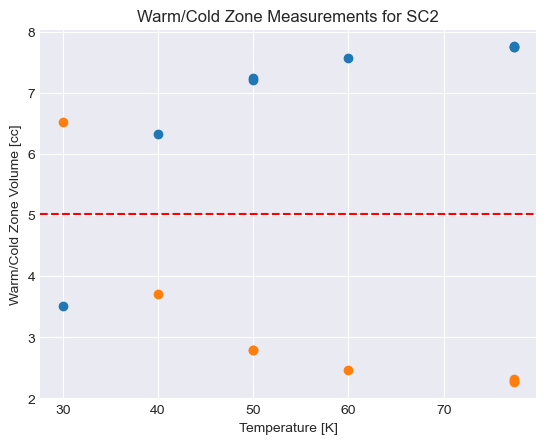

In [396]:
#SC2:
T=[77.35,77.35,77.35,50,50,30,40,60]
warm=[7.74373,7.75562,7.76013,7.21592,7.25015,3.51007,6.32841,7.57418]
cold=[2.31123,2.28352,2.26331,2.80018,2.78784,6.51811,3.70935,2.46384]
plt.scatter(T,warm,label="Warm Zone")
plt.scatter(T,cold,label="Cold Zone")
plt.axhline(Vc/2, color='red', linestyle='--',label="Vc/2")
plt.title("Warm/Cold Zone Measurements for SC2")
plt.xlabel("Temperature [K]")
plt.ylabel("Warm/Cold Zone Volume [cc]")

In [397]:
#Bei 50 gemessen aber 30 gerechnet

pk=300 #frei gewählt+
Tw=299.72
Vc=11.4078
Vm=20.2436

Tk=30
Vw_30=9.89966 #actual measured Data
pm=((Vw_30*(pk/Tw-pk/Tk)+pk*Vc/Tk)*Tw+Vm*pk)/(Vm+Vc)
Tk=50
Vw_50=((Vm*(pm-pk)+pm*Vc)/Tw-pk*Vc/Tk)/(pk/Tw-pk/Tk)
print(Vw_50)
print(Vc-Vw_50)

8.692922531902395
2.7148774680976047


Text(0, 0.5, 'Warm/Cold Zone Volume [cc]')

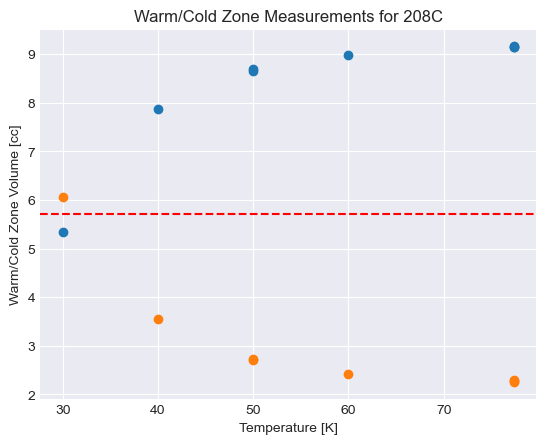

In [398]:

#208C
T=[77.35,77.35,77.35,50,50,30,40,60]
warm=[9.16163,9.14367,9.14378,8.6621,8.69292,5.33903,7.86425,8.98088]
cold=[2.28751,2.26631,2.24705,2.72406,2.71487,6.06054,3.54343,2.42691]
plt.scatter(T,warm,label="Warm Zone")
plt.scatter(T,cold,label="Cold Zone")
plt.axhline(Vc/2, color='red', linestyle='--',label="Vc/2")
plt.title("Warm/Cold Zone Measurements for 208C")
plt.xlabel("Temperature [K]")
plt.ylabel("Warm/Cold Zone Volume [cc]")

Text(0.5, 1.0, 'Data and Fitted Curve')

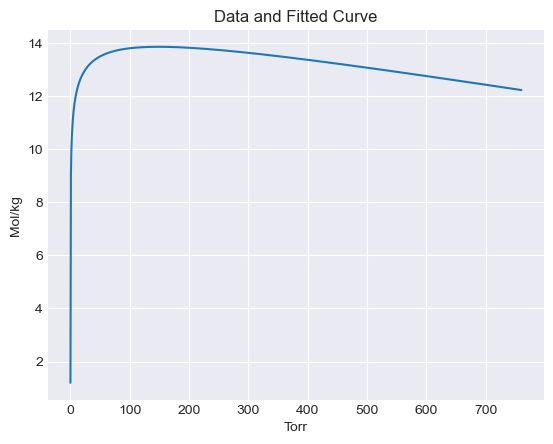

In [399]:

#Annahmen: H2 ideales gas und STP bei 273,15K
#40K: nmax: 16.30072556794853 a: 3845.347788918336 b: 29.68662155753672 p0: 811.4644871274309 Va: 0.012951170406633824
# Generate x values for the fitted curve
params_40=[14.807676764066043,3697.553990429429,36.08873981491281,883.2395731555158,0.016166582668342835]
x_fit_cons = np.linspace(0.0001, 1*760, 1000)

# Calculate y values for the fitted curve using optimized parameters
y_fit_cons = custom_formula(x_fit_cons, *params_40)

plt.plot(x_fit_cons, y_fit_cons)
# Add labels and legend
plt.xlabel('Torr')
plt.ylabel('Mol/kg')
plt.title('Data and Fitted Curve')






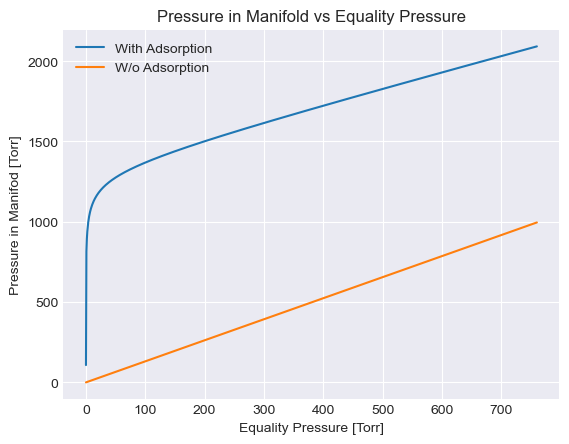

In [400]:
Tw=299.71
Vc=10.038
Vm=20.3930
Vk=3.70935
Vw=6.32841
Tk=40
pk=np.linspace(0.0001,760,1000)
mac=1/1000*0.0979
Vads=custom_formula(pk, *params_40)

R=8.31446*0.00750062*1e+6  #R=8.31446 J/(mol*K)=pa*m^3; V  in cc ; p in Torr; pa = 0.00750062 Torr ; m^3 = 1e+6 cc
#Erhaltungssatz: n=const=nm+nw+nk+nads t=0:n=nm nm=Vm*pm/(R*Tw) t=1: nm=Vm*pk/(R*Tw) nw=Vw*pk/(R*Tw) nk=Vk*pk/(R*Tk) nads=Vads(p)*mac 
# ------> nach pm auflösen: Vm*pm/(R*Tw)=Vm*pk/(R*Tw)+Vw*pk/(R*Tw)+Vads(pk)*mac
pm_ads=(Vm*pk/(R*Tw)+Vw*pk/(R*Tw)+Vads*mac)*(R*Tw)/Vm
plt.plot(pk,pm_ads,label="With Adsorption")
#ohne Adsorption
pm=(Vm*pk/(R*Tw)+Vw*pk/(R*Tw))*(R*Tw)/Vm
plt.plot(pk,pm,label="W/o Adsorption")
plt.title("Pressure in Manifold vs Equality Pressure")
plt.xlabel("Equality Pressure [Torr]")
plt.ylabel("Pressure in Manifod [Torr]")
plt.legend()


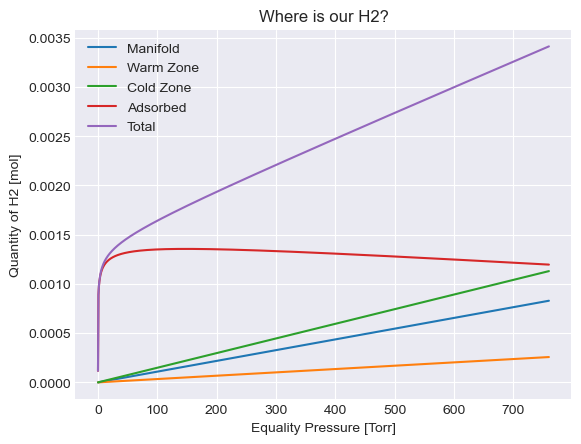

In [401]:
plt.plot(pk,Vm*pk/(R*Tw),label="Manifold")
plt.plot(pk,Vw*pk/(R*Tw),label="Warm Zone")
plt.plot(pk,Vk*pk/(R*Tk),label="Cold Zone")
plt.plot(pk,Vads*mac,label="Adsorbed" )
plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw),label="Total") 
plt.title("Where is our H2?")
plt.xlabel("Equality Pressure [Torr]")
plt.ylabel("Quantity of H2 [mol]")
plt.legend()

Our corrected Isotherm is somewhere in between the red and purple line.

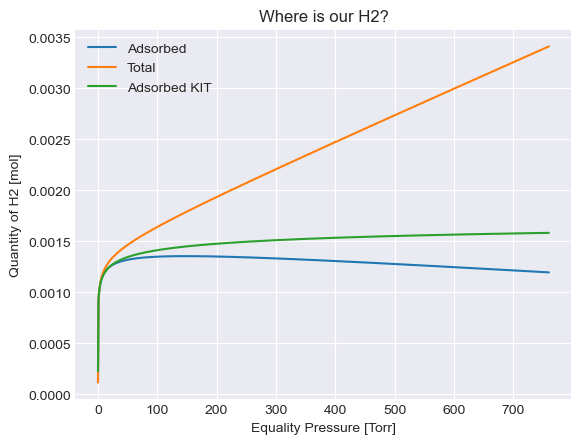

In [402]:
plt.plot(pk,Vads*mac,label="Adsorbed")

plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw),label="Total")

params_40_kit=[18.38840994469417,5567.931106239327,49.31246945826915,128614.66844908435,0.0004341053465608137]
Vads_kit=custom_formula(pk, *params_40_kit)
plt.plot(pk,Vads_kit*mac,label="Adsorbed KIT")

plt.title("Where is our H2?")
plt.xlabel("Equality Pressure [Torr]")
plt.ylabel("Quantity of H2 [mol]")
plt.legend()

Max Estimate of Warm Zone (40K):  7.367862997118253
Min Estimate of Warm Zone (40K):  6.7387596211418925
Constant Estimate of Warm Zone (40K):  7.7531600169810675


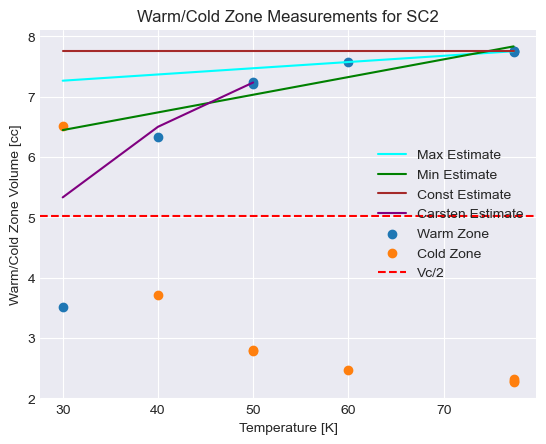

In [403]:
#SC2:
T=[77.35,77.35,77.35,50,50,30,40,60]
warm=[7.74373,7.75562,7.76013,7.21592,7.25015,3.51007,6.32841,7.57418]
cold=[2.31123,2.28352,2.26331,2.80018,2.78784,6.51811,3.70935,2.46384]
def lin(x,a,b):
    return a*x+b
params_const, covariance = curve_fit(lin, [77.35,77.35,77.35,0], [7.74373,7.75562,7.76013,7.75316])
params_max, covariance = curve_fit(lin, [77.35,77.35,77.35,60], [7.74373,7.75562,7.76013,7.57418])
params_min, covariance = curve_fit(lin, [77.35,77.35,77.35,50,50,40,60], [7.74373,7.75562,7.76013,7.21592,7.25015,6.3284,7.57418])
Ts=np.array([30,77.35])
plt.plot(Ts,lin(Ts,*params_max),color="cyan",label="Max Estimate")
plt.plot(Ts,lin(Ts,*params_min),color="green",label="Min Estimate")
plt.plot(Ts,lin(Ts,*params_const),color="brown",label="Const Estimate")
plt.plot([30,40,50],[5.33,6.5,7.235],color="purple",label="Carsten Estimate")
plt.scatter(T,warm,label="Warm Zone")
plt.scatter(T,cold,label="Cold Zone")
plt.axhline(Vc/2, color='red', linestyle='--',label="Vc/2")
plt.title("Warm/Cold Zone Measurements for SC2")
plt.xlabel("Temperature [K]")
plt.ylabel("Warm/Cold Zone Volume [cc]")
print("Max Estimate of Warm Zone (40K): " , lin(40,*params_max))
print("Min Estimate of Warm Zone (40K): " , lin(40,*params_min))
print("Constant Estimate of Warm Zone (40K): " , lin(40,*params_const))
plt.legend()

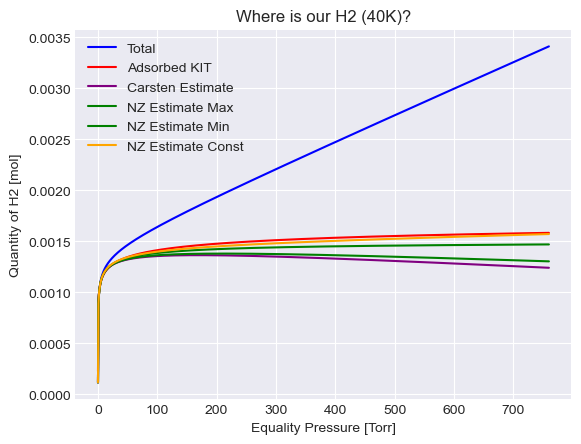

In [404]:

plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw),color="blue",label="Total")

params_40_kit=[18.38840994469417,5567.931106239327,49.31246945826915,128614.66844908435,0.0004341053465608137]
Vads_kit=custom_formula(pk, *params_40_kit)
plt.plot(pk,Vads_kit*mac,color="red",label="Adsorbed KIT")

#Vads*mac=ntot-(nm+mw+nc)
#3 Verschiedene Warm Zone Schätzungen:
Vw_Carsten=6.5
Vw_NZ_max=7.367862997118253
Vw_NZ_min=6.7387596211418925
Vw_NZ_const=7.7531600169810675
plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw)-(Vc-Vw_Carsten)*pk/(R*Tk)-Vw_Carsten*pk/(R*Tw)-Vm*pk/(R*Tw),color="purple",label="Carsten Estimate")
plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw)-(Vc-Vw_NZ_max)*pk/(R*Tk)-Vw_NZ_max*pk/(R*Tw)-Vm*pk/(R*Tw),color="green",label="NZ Estimate Max")
plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw)-(Vc-Vw_NZ_min)*pk/(R*Tk)-Vw_NZ_min*pk/(R*Tw)-Vm*pk/(R*Tw),color="green",label="NZ Estimate Min")
plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw)-(Vc-Vw_NZ_const)*pk/(R*Tk)-Vw_NZ_const*pk/(R*Tw)-Vm*pk/(R*Tw),color="orange",label="NZ Estimate Const")


plt.title("Where is our H2 (40K)?")
plt.xlabel("Equality Pressure [Torr]")
plt.ylabel("Quantity of H2 [mol]")
plt.legend()



Daraus lassen sich 2 schlüsse ziehen: a) Das Warm Zone Volume ist Konstant mit der Temperatur oder b) Das KIT ist von einem konstanten Warm Zone Volume bei ihrem Aufbau ausgegangen


a) Würde bedeuten, dass sich alle Isotherme mit dem Warm Zone Volumen von ca. 7.753cc korrigieren lassen. Bereits ab 60K beginnt die Adsorption von Helium. Außerdem findet wahrscheinlich kein Helium Entrappment statt, sondern nur Adsorption.

b) Sollte die Warm Zone nicht Konstant sein, so überschätzen die Ergebnisse vom KIT die wahren Isotherme. Über ein Helium-Entrappment, lässt sich nur schwer etwas sagen.

Zwischen KIT und Corrected Isotherm ist ein kleiner Unterschied, dieser kann mehrere Gründe haben:
Es ist zu beachten, dass die Helium Entrappment Theorie noch nicht wiederlegt ist und keine Korrektur bzgl. non-ideality gemacht wurde. Also the adsorbed line of KIT in the plot is a fast fit of their measurements, which can also explain the small deviation of the corrected Isotherm and the KIT.


Die Helium Entrappment Theorie soll durch eine 8h helium removal Time getestet werden. Alternativ besteht die Überlegung die 40K Isotherme ohne eine Helium Void Volume Messung zu wiederholen und dabei das für die Korrektur geschätzte Warm Zone Volumen zu nehmen. Um die Korrektur jedoch zu bestätigen, was von nöten ist um von möglichen Abweichungen der gemessenen zur korrigierten Isotherme auf ein Helium Entrappment zu schließen. Muss eine p(T) Isochore mit Helium für die Zelle mit und ohne Aktivkohle erstellt werden.


Ziel ist es nun nach der Helium Removal Time Messung erst einmal die p(T) Helium Isochore mit Aktivkohle zu messen und aus dem Verlauf mehr über die Temperaturabhängigkeit der Warmzone und der Helium Adsorption zu erfahren. 

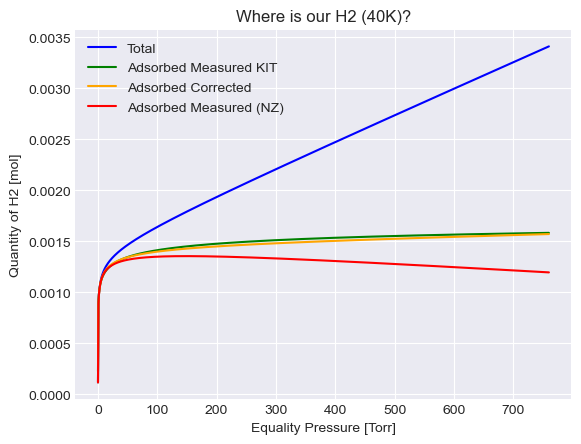

In [405]:

plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw),color="blue",label="Total")

plt.plot(pk,Vads_kit*mac,color="green",label="Adsorbed Measured KIT")

#Vads*mac=ntot-(nm+mw+nc)
#3 Verschiedene Warm Zone Schätzungen:

Vw_NZ_const=7.753

plt.plot(pk,Vads*mac+Vk*pk/(R*Tk)+Vw*pk/(R*Tw)+Vm*pk/(R*Tw)-(Vc-Vw_NZ_const)*pk/(R*Tk)-Vw_NZ_const*pk/(R*Tw)-Vm*pk/(R*Tw),color="orange",label="Adsorbed Corrected")
plt.plot(pk,Vads*mac,color="red",label="Adsorbed Measured (NZ)")

plt.title("Where is our H2 (40K)?")
plt.xlabel("Equality Pressure [Torr]")
plt.ylabel("Quantity of H2 [mol]")
plt.legend()



In [406]:
### 100 Torr He bei 40K:

#0.002 Mol
#bei RT und V=Vm+Vc
Vc=10.038
Vm=20.3930
rho_molar=PropsSI("DMOLAR", "P", 101325, "T", 300, "Hydrogen") #mol/m3
V=0.0015*1/rho_molar
p_result=760*V*1000000/(Vm+Vc)
print(p_result)

922.7522103732196


In [407]:
Vw_NZ_const=7.7531600169810675
Vk=Vc-Vw_NZ_const

p=228
R=8.31446*0.00750062*1e+6 
n=p*(Vm+Vw_NZ_const)/(R*299)+p*Vk/(R*40)
print(n)
rho_molar=PropsSI("DMOLAR", "P", 101325, "T", 300, "Helium") #mol/m3
rho_molar_cold=PropsSI("DMOLAR", "P", 101325, "T", 200, "Helium") #mol/m3
(Vm+Vw_NZ_const)/(R*299)+p*Vk/(R*40)
V=n/rho_molar
p_result=760*V*1000000/(Vm+Vc)
print(p_result)



0.0005529861786266264
340.14107050001445


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


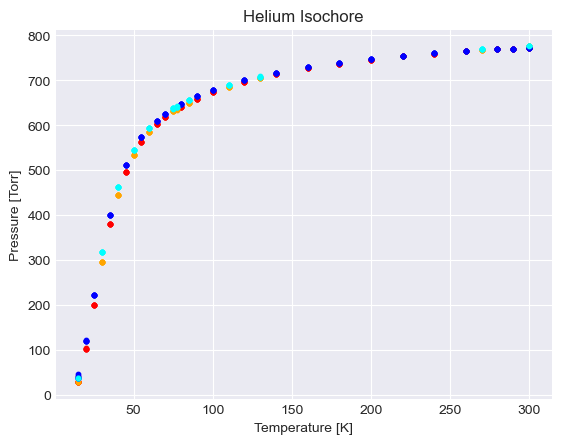

In [408]:
#Messchema: Pro T (5 Messwerte über eine Minute)
#Anfang:Tm=26.8 °C p/m 0.1K Ende:Tm=28.1 °C
#dT 0.1K(eher um einiges kleiner bis 0.01K) and dp für Sensor:Torr1000 von 800 - 8 Torr (google)
#bei 15K kurz warten (10min) und dann schauen wie sich das ganze beim aufwärmen verhält
T=[300,290,280,260,240,220,200,180,160,140,120,100,90,80,70,65,55,45,35,25,20,15,15,30,40,50,60,77.35,85,75,110,130,270,300]
p1=[772.0665,770.7842,769.1388,764.7402,759.6992,753.5397,746.1348,737.4048,726.8790,713.7978,696.7298,674.2281,659.3930,641.1979,617.5467,602.5256,563.8559,496.688,379.6994,200.4805,103.4499,40.3013,28.0220,295.7560,444.7454,533.7734,584.2773,634.6760,650.3900,630.6940,685.7218,704.9507,768.3270,775.3034]
p1_st2=[771.9222,770.6640,769.1028,765.0873,760.2205,754.3671,747.3981,739.0917,729.1310,716.6788,700.4250,678.9320,664.7616,647.3581,624.9749,610.5970,574.1313,511.2093,400.0634,222.4125,121.3348,45.5135,38.1970,317.8903,462.1897,545.8315,593.5288,641.2257,656.1669,637.3508,690.0551,708.4766,768.9202,775.4666]
p2=[772.1363,770.7754,769.1072,764.7802,759.6486,753.4107,746.1037,737.4034,726.8370,713.8345,696.6970,674.1782,659.4167,641.1572,617.6224,602.4957,563.9017,496.7114,379.7528,200.5497,102.8869,31.0823,27.9016,295.7269,444.9306,533.8557,584.8915,635.2002,650.5456,630.7345,685.8422,704.9990,768.3862,775.3298]
p2_st2=[771.8332,770.6791,769.1230,765.0408,760.2013,754.3429,747.3626,739.0852,729.0842,716.6741,700.4641,678.8528,664.7585,647.3849,624.9570,610.5784,574.1593,511.1334,400.0053,222.4506,120.7005,41.2205,38.0650,317.8266,462.2072,545.8797,593.8324,641.3698,656.1965,637.4468,690.1311,708.4558,768.9227,775.5035]
p3=[772.1999,770.7669,769.1043,764.7862,759.5979,753.4072,746.0790,737.3899,726.8379,713.7742,696.6338,674.1702,659.4033,641.1712,617.6143,602.4997,563.8859,496.7329,379.6799,200.6064,102.4042,29.2700,28.0003,295.6803,444.9679,533.9450,585.0100,635.4226,650.5327,630.7921,685.8691,705.0407,768.43554,775.3984]
p3_st2=[771.9940,770.6984,769.0926,765.0316,760.1478,754.3343,747.3617,739.1231,729.1000,716.6657,700.3930,678.8566,664.7778,647.3089,624.9280,610.5929,574.1203,511.1371,399.9621,222.3802,120.4234,39.2900,38.1874,317.8615,462.2452,545.9175,593.8846,641.7527,656.2377,637.5014,690.1520,708.5406,768.9314,775.5263]
p4=[772.2436,770.8044,769.1034,764.7716,759.5711,753.3975,746.1244,737.3194,726.8369,713.7687,696.6830,674.1816,659.4230,641.1427,617.4904,602.4452,563.8253,496.7044,379.6512,200.5414,102.3188,28.1500,28.1853,295.7490,444.9569,533.9580,585.0703,635.4770,650.5072,630.8092,685.9077,705.0754,768.4179,775.3848]
p4_st2=[772.0530,770.6919,769.1080,765.0320,760.1505,754.2931,747.3621,739.1241,729.0636,716.6651,700.3616,678.8344,664.7398,647.3622,624.8801,610.5539,574.0818,511.1395,399.8538,222.2909,120.3440,38.4305,38.4116,317.9160,462.3138,545.8979,593.8852,641.8031,656.2819,637.4405,690.1455,708.5063,768.9553,775.5637]
p5=[772.2701,770.8680,769.1545,764.7954,759.5539,753.3778,746.0585,737.3777,726.7799,713.7482,696.6896,674.1851,659.3730,641.1081,617.5668,602.4446,563.8213,496.6741,379.5491,200.5040,102.3144,28.1600,28.2143,295.7392,445.0462,533.9029,585.0336,635.5372,650.5806,630.8222,685.9188,705.1473,768.4192,775.3670]
p5_st2=[772.1098,770.7520,769.1342,765.0475,760.1541,754.2733,747.3756,739.1005,729.1132,716.6225,700.3894,678.8244,664.7548,647.2929,624.8244,610.5219,574.0558,511.1550,399.8484,222.3091,120.2091,38.4600,38.4062,317.8841,462.3415,545.9458,593.8959,641.8706,656.3362,637.4268,690.2281,708.5873,768.9894,775.5942]
i=len(p1)
p_st1=[p1,p2,p3,p4,p5]
p_st2=[p1_st2,p2_st2,p3_st2,p4_st2,p5_st2]
l=22
for j in p_st1:
    
    plt.scatter(T[:l],j[:l],c="red",s=10)
    plt.scatter(T[l:i],j[l:],c="orange",s=10)
for j in p_st2:
    plt.scatter(T[:l],j[:l],c="blue",s=10)
    plt.scatter(T[l:i],j[l:],c="cyan",s=10)
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Torr]")
plt.title("Helium Isochore")
plt.legend()


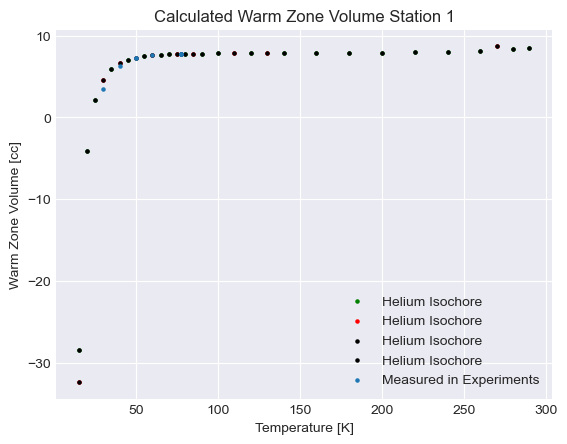

In [409]:
#SC2
Vw=[]
for j in range(len(p1)-2):
    Vws=[]
    for i in p_st1:
        pm=i[0]
        Tk=T[j+1]
        Tw=300
        pk=i[j+1]
        Vc=10.03391
        Vm=20.3930
        pm=pm*(Vm+Vc)/Vm # pressure correction
        Vws.append((Vm/Tw*(pm/pk-1)-Vc/Tk)/(1/Tw-1/Tk)) 
        
    Vw.append(np.mean(Vws))

i=len(p1)-1

plt.scatter(T[1:l],Vw[:l-1],c="green",label="Helium Isochore",s=5)
plt.scatter(T[l:i],Vw[l-1:],c="red",label="Helium Isochore",s=5)
#SC2
Vw=[]
for j in range(len(p1)-2):
    Vws=[]
    for i in p_st1:
        pm=i[0]
        Tk=T[j+1]
        Tw=300
        pk=i[j+1]
        Vc=10.03391
        Vm=20.3930#+Vc TODO
        Vws.append((pm/pk*(Vm+Vc)/Tw-Vm/Tw-Vc/Tk)/(1/Tw-1/Tk)) 
    Vw.append(np.mean(Vws))

i=len(p1)-1

plt.scatter(T[1:l],Vw[:l-1],c="black",label="Helium Isochore",s=5)
plt.scatter(T[l:i],Vw[l-1:],c="black",label="Helium Isochore",s=5)
plt.xlabel("Temperature [K]")
plt.ylabel("Warm Zone Volume [cc]")
plt.title("Calculated Warm Zone Volume Station 1")
T_exp=[77.35,77.35,77.35,50,50,30,40,60]
warm=[7.74373,7.75562,7.76013,7.21592,7.25015,3.51007,6.32841,7.57418]
plt.scatter(T_exp,warm,label="Measured in Experiments",s=5)
plt.legend(loc="lower right")


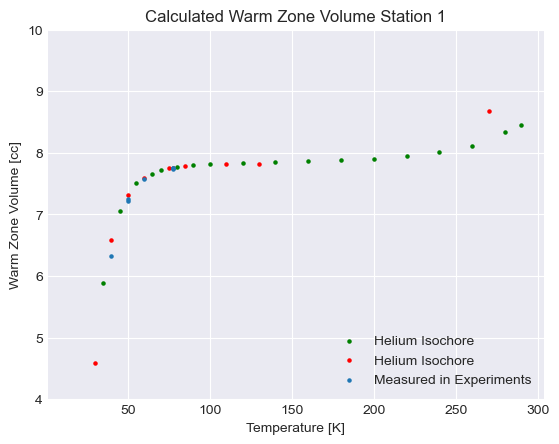

In [410]:
plt.scatter(T[1:l],Vw[:l-1],c="green",label="Helium Isochore",s=5)
plt.scatter(T[l:i],Vw[l-1:],c="red",label="Helium Isochore",s=5)
plt.xlabel("Temperature [K]")
plt.ylabel("Warm Zone Volume [cc]")
plt.title("Calculated Warm Zone Volume Station 1")
T_exp=[77.35,77.35,77.35,50,50,30,40,60]
warm=[7.74373,7.75562,7.76013,7.21592,7.25015,3.51007,6.32841,7.57418]
plt.scatter(T_exp,warm,label="Measured in Experiments",s=5)
plt.legend(loc="lower right")
plt.ylim([4,10])
Vw_SC2=Vw

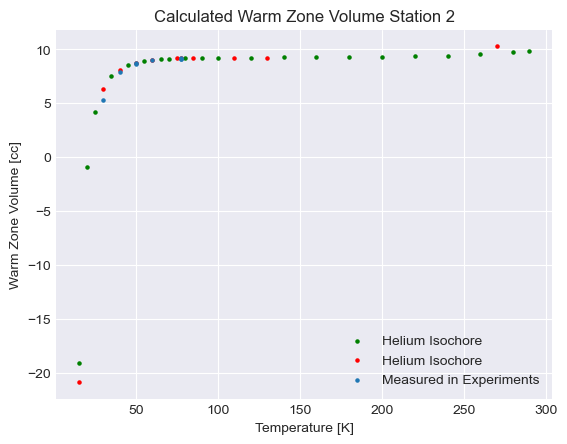

In [411]:
#208
Vw=[]
for j in range(len(p1)-2):
    Vws=[]
    for i in p_st2:
        pm=i[0]
        Tk=T[j+1]
        Tw=300
        pk=i[j+1]
        Vc=11.4078
        Vm=20.5806
        Vws.append(((Vm*(pm-pk)+pm*Vc)/Tw-pk*Vc/Tk)/(pk/Tw-pk/Tk))
    Vw.append(np.mean(Vws))

i=len(p1)-1

plt.scatter(T[1:l],Vw[:l-1],c="green",label="Helium Isochore",s=5)
plt.scatter(T[l:i],Vw[l-1:],c="red",label="Helium Isochore",s=5)
plt.xlabel("Temperature [K]")
plt.ylabel("Warm Zone Volume [cc]")
plt.title("Calculated Warm Zone Volume Station 2")
T_exp=[77.35,77.35,77.35,50,50,30,40,60]
warm=[9.16163,9.14367,9.14378,8.6621,8.69292,5.33903,7.86425,8.98088]
plt.scatter(T_exp,warm,label="Measured in Experiments",s=5)

plt.legend(loc="lower right")

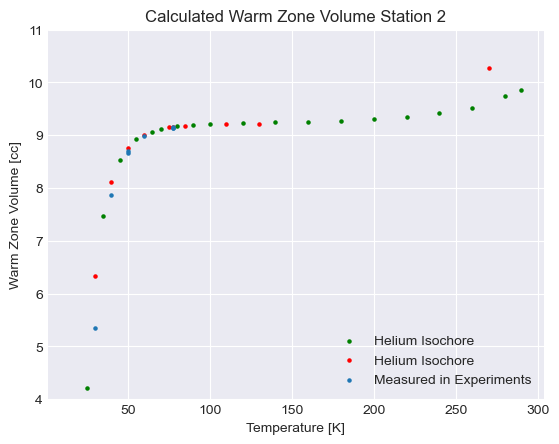

In [412]:
plt.scatter(T[1:l],Vw[:l-1],c="green",label="Helium Isochore",s=5)
plt.scatter(T[l:i],Vw[l-1:],c="red",label="Helium Isochore",s=5)
plt.xlabel("Temperature [K]")
plt.ylabel("Warm Zone Volume [cc]")
plt.title("Calculated Warm Zone Volume Station 2")
T_exp=[77.35,77.35,77.35,50,50,30,40,60]
warm=[9.16163,9.14367,9.14378,8.6621,8.69292,5.33903,7.86425,8.98088]
plt.scatter(T_exp,warm,label="Measured in Experiments",s=5)
plt.legend(loc="lower right")
plt.ylim([4,11])
Vw_208=Vw


Diskussionspunkte etc.: Non ideality Korrektur. Wärmeübergang von T abhängig?, Wo beginnt Adsorption (dazu empty Cell vermessen)?

15 bis 200

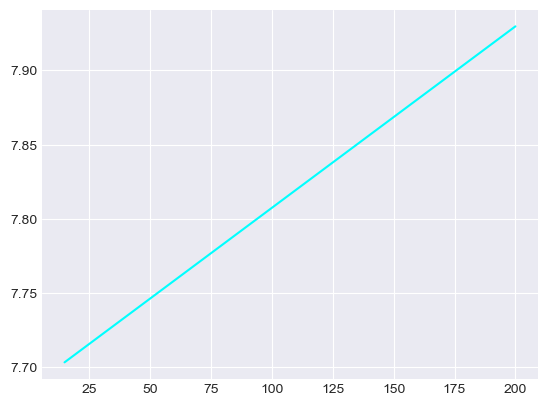

In [413]:
Ts=np.array([15,200])

def lin(x,a,b):
    return a*x+b

params_15_200, covariance = curve_fit(lin, T[4:13], Vw_SC2[3:12])
plt.plot(Ts,lin(Ts,*params_15_200),color="cyan",label="Max Estimate")
def Warmzone_15_200(T):
    return lin(T,*params_15_200)

[220, 200, 180, 160, 140, 120, 100, 90]


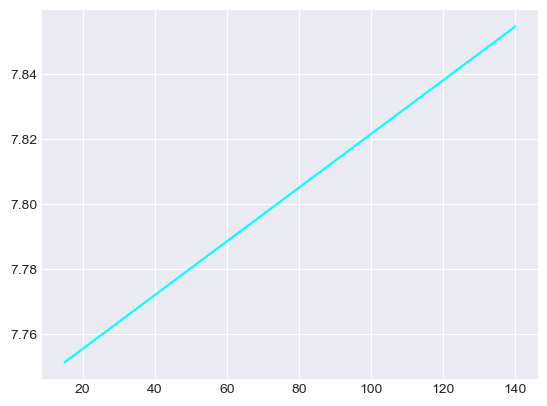

In [414]:
Ts=np.array([15,140])
print(T[5:13])
def lin(x,a,b):
    return a*x+b

params_15_140, covariance = curve_fit(lin, T[9:12], Vw_SC2[8:11])
plt.plot(Ts,lin(Ts,*params_15_140),color="cyan",label="Max Estimate")
def Warmzone_15_140(T):
    return lin(T,*params_15_140)

(4.0, 10.0)

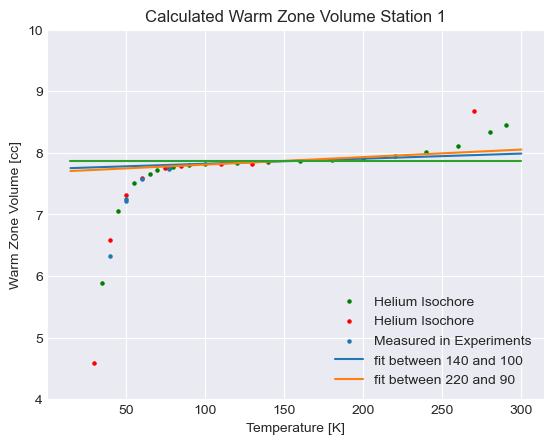

In [415]:
plt.scatter(T[1:l],Vw_SC2[:l-1],c="green",label="Helium Isochore",s=5)
plt.scatter(T[l:i],Vw_SC2[l-1:],c="red",label="Helium Isochore",s=5)
plt.xlabel("Temperature [K]")
plt.ylabel("Warm Zone Volume [cc]")
plt.title("Calculated Warm Zone Volume Station 1")
T_exp=[77.35,77.35,77.35,50,50,30,40,60]
warm=[7.74373,7.75562,7.76013,7.21592,7.25015,3.51007,6.32841,7.57418]
plt.scatter(T_exp,warm,label="Measured in Experiments",s=5)
T_plot=np.linspace(15,300)
plt.plot(T_plot,Warmzone_15_140(T_plot),label="fit between 140 and 100")
plt.plot(T_plot,Warmzone_15_200(T_plot),label="fit between 220 and 90")
plt.plot([15,300],[7.868088866234045,7.868088866234045])
plt.legend(loc="lower right")
plt.ylim([4,10])


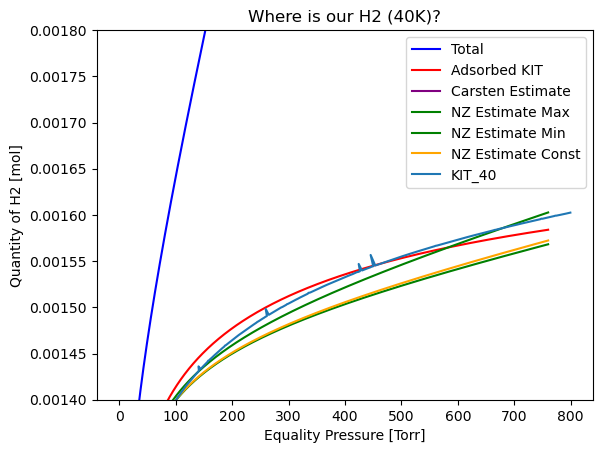





Rechnet man die isothermen um so gibt es ca. 3% Abweichungen zur KIT Isotherme. Womöglich liegt das an der noch nicht berücksichtigten NON ideality Korrektur. Die beste Korrektur für Helium Adsorption, welche adsorptionseffekjte eliminiert und wärmeübergang(T) berücksichtigt, kann außerdem erst nach der empty Cell Messung durchgeführt werden. 

In [416]:
T_expee=20.37
print(Warmzone_15_140(T_expee))
print(Warmzone_15_200(T_expee))
print("Bei 140K-Wert Konstant:",7.868088866234045)


7.75560481779502
7.709793061315909
Bei 140K-Wert Konstant: 7.868088866234045


/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/1512364236.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(pressure_40, volume_40,label="1h Helium Removal (208C)",marker='x', s=15, edgecolor='black', linewidth=0.75)
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/1512364236.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(pressure_40_8h, volume_40_8h,label="8h Helium Removal (208C)",marker='x', s=15, edgecolor='black', linewidth=0.75)
/var/folders/xm/qnmpmpfn4k9gsr6mycrzv8_40000gn/T/ipykernel_7626/1512364236.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the e

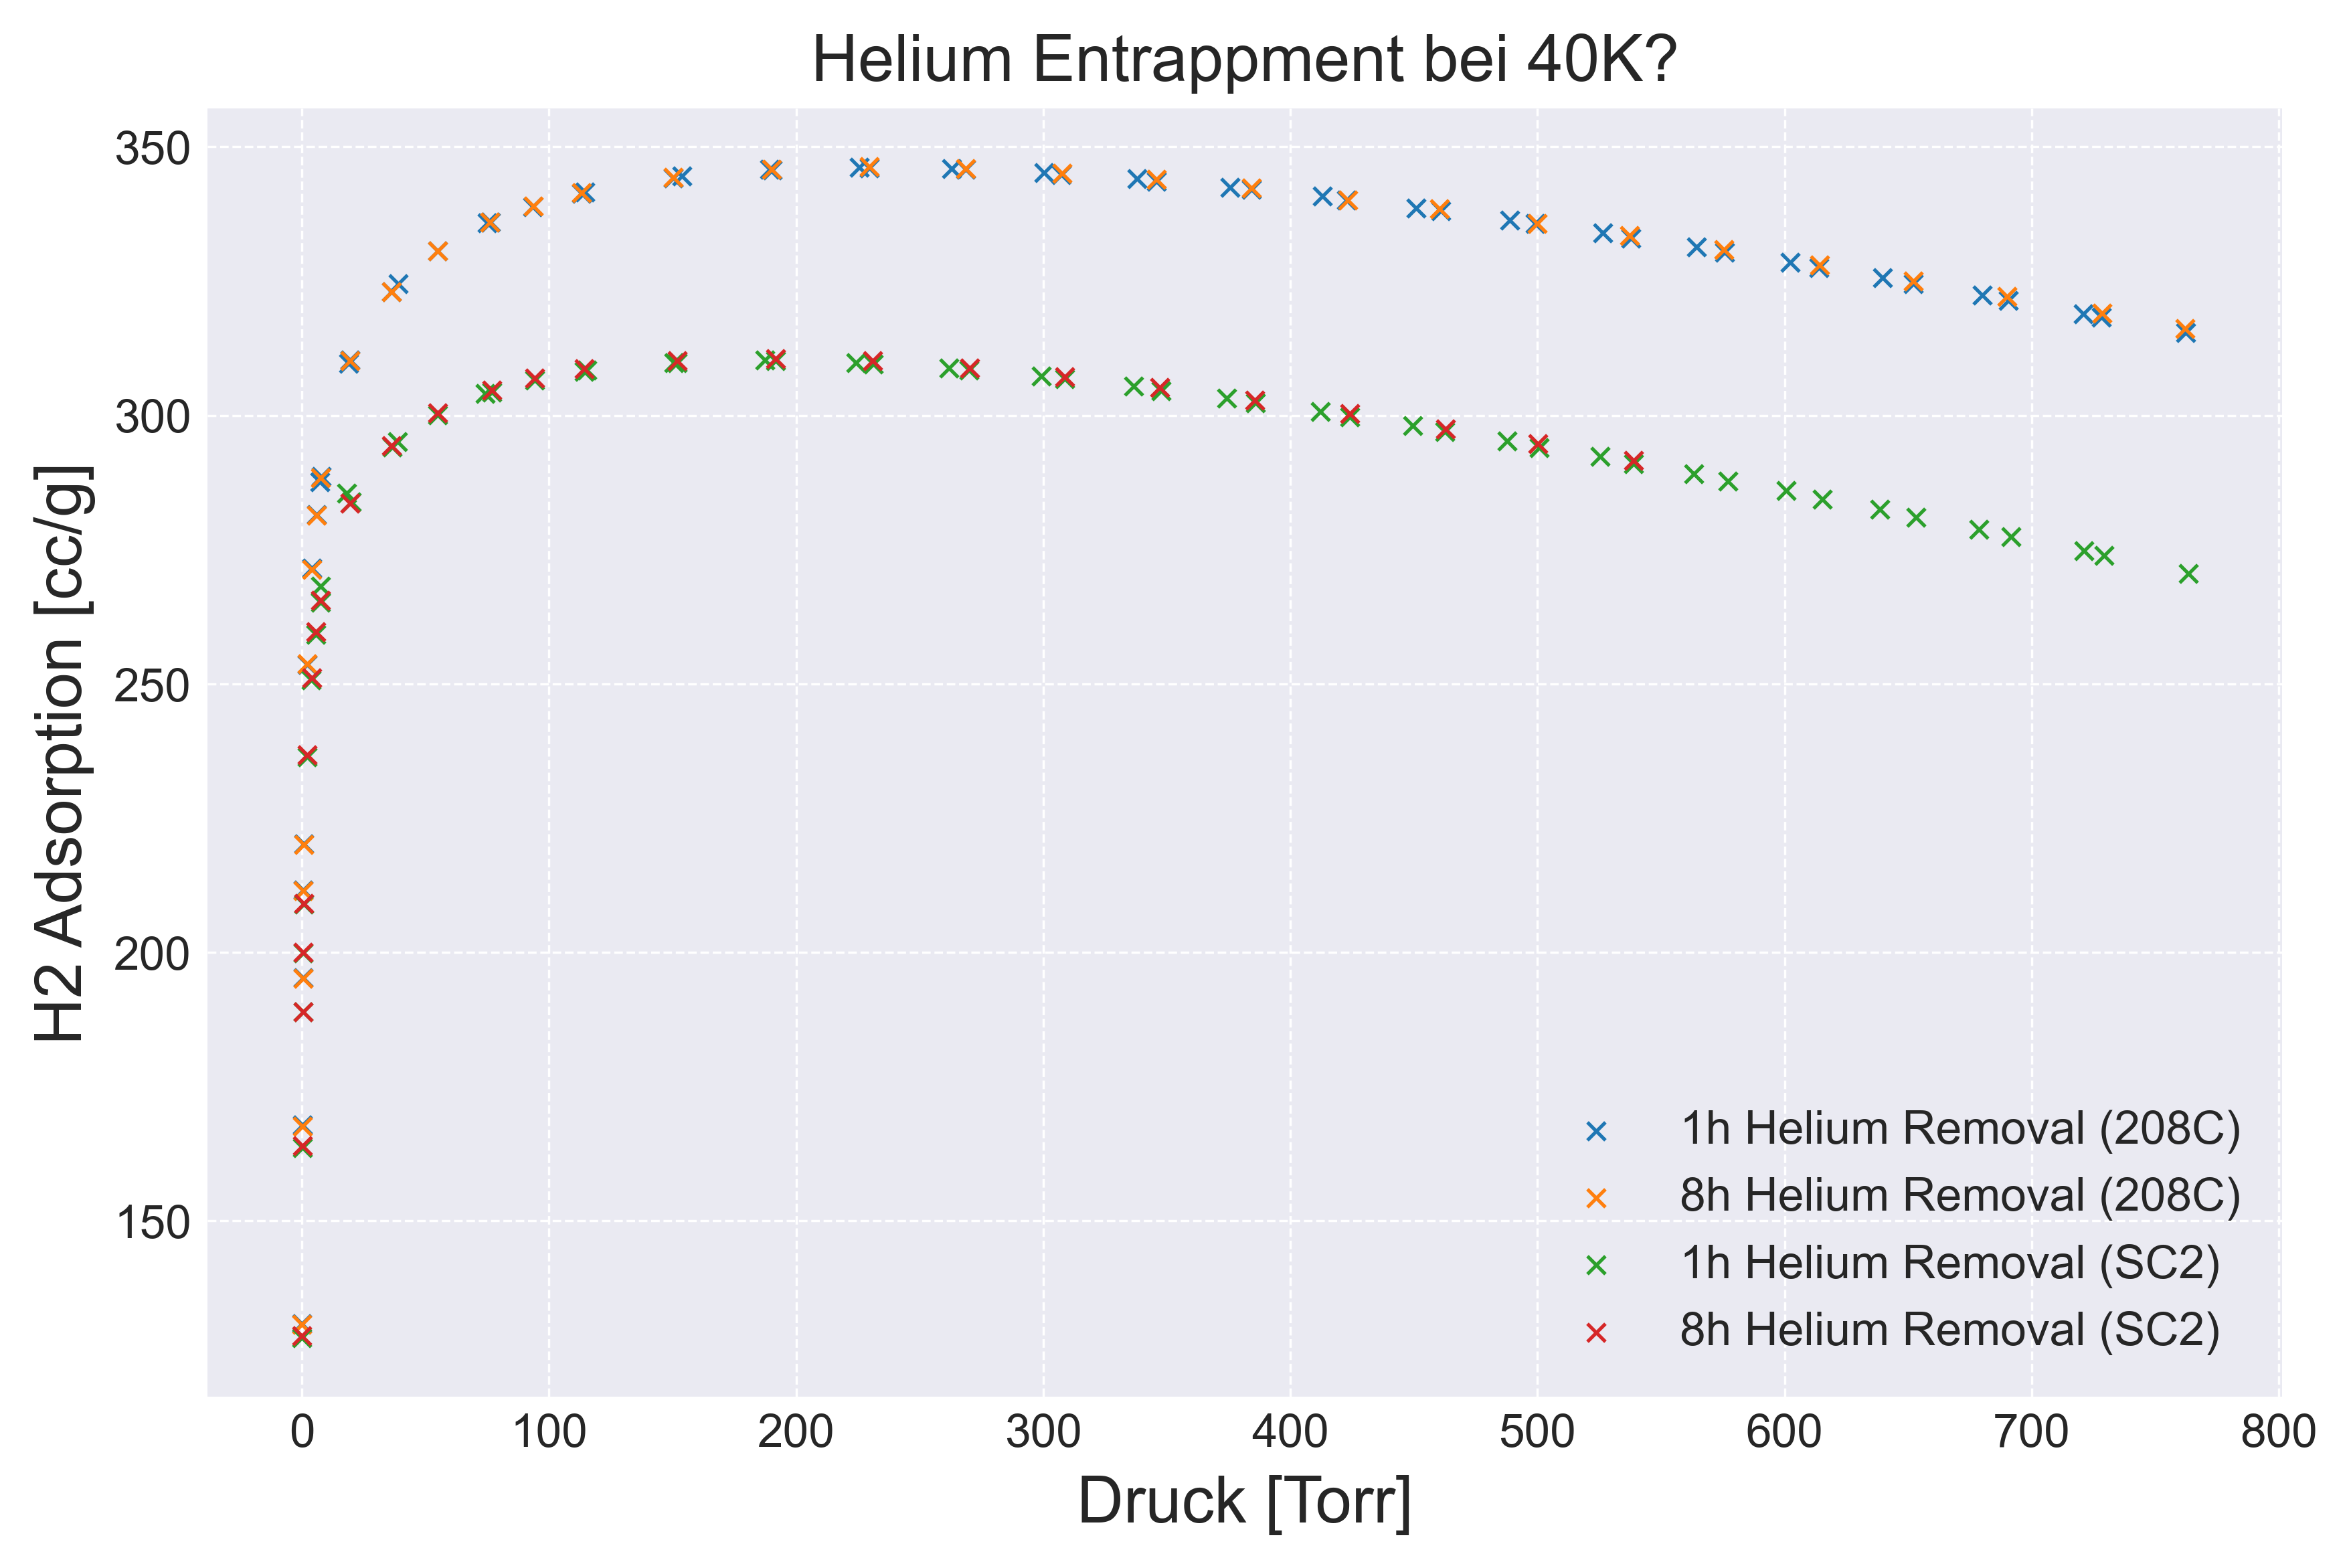

In [417]:

plt.figure(figsize=(8, 5), dpi=500)
#208C:
# Stil einstellen
plt.style.use('seaborn-darkgrid')  # Beispiel: 'seaborn-darkgrid' Stil

plt.grid(True, which="both", linestyle='--', linewidth=0.5)

pressure_40,volume_40=load_data_sep('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_40K_Cryo_MD__iq_phisy_st2_2024_05_28_19_16_15 (Absolute Isotherm).csv',relative=False)
pressure_40_8h,volume_40_8h=load_data_sep('/Users/nick/Documents/Messdaten BA/NZ208V3_H2_40K_8hHere_Cryo_MD__iq_phisy_st2_2024_05_29_19_16_21 (Absolute Isotherm).csv',relative=False)



 

plt.scatter(pressure_40, volume_40,label="1h Helium Removal (208C)",marker='x', s=15, edgecolor='black', linewidth=0.75)
plt.scatter(pressure_40_8h, volume_40_8h,label="8h Helium Removal (208C)",marker='x', s=15, edgecolor='black', linewidth=0.75)

#SC2:


pressure_40,volume_40=load_data_sep('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_40K_Cryo_MD__iq_phisy_st1_2024_05_28_19_16_15 (Absolute Isotherm).csv',relative=False)
pressure_40_8h,volume_40_8h=load_data_sep('/Users/nick/Documents/Messdaten BA/NZSC2V3_H2_40K_8hHere_Cryo_MD__iq_phisy_st1_2024_05_29_19_16_21 (Absolute Isotherm).csv',relative=False)



 
i=6
plt.scatter(pressure_40, volume_40,label="1h Helium Removal (SC2)",marker='x', s=15, edgecolor='black', linewidth=0.75)
plt.scatter(pressure_40_8h[:-i], volume_40_8h[:-i],label="8h Helium Removal (SC2)",marker='x', s=15, edgecolor='black', linewidth=0.75)

plt.xlabel("Druck [Torr]",fontsize=14)
plt.ylabel("H2 Adsorption [cc/g]",fontsize=14)
plt.title("Helium Entrappment bei 40K?",fontsize=14)           
plt.legend()   

In [465]:
print(PropsSI("DMOLAR", "P", 763.1211*133.322, "T", 300, "Hydrogen")*(11.618+20.5806)/1000000)

0.0013125568904412475


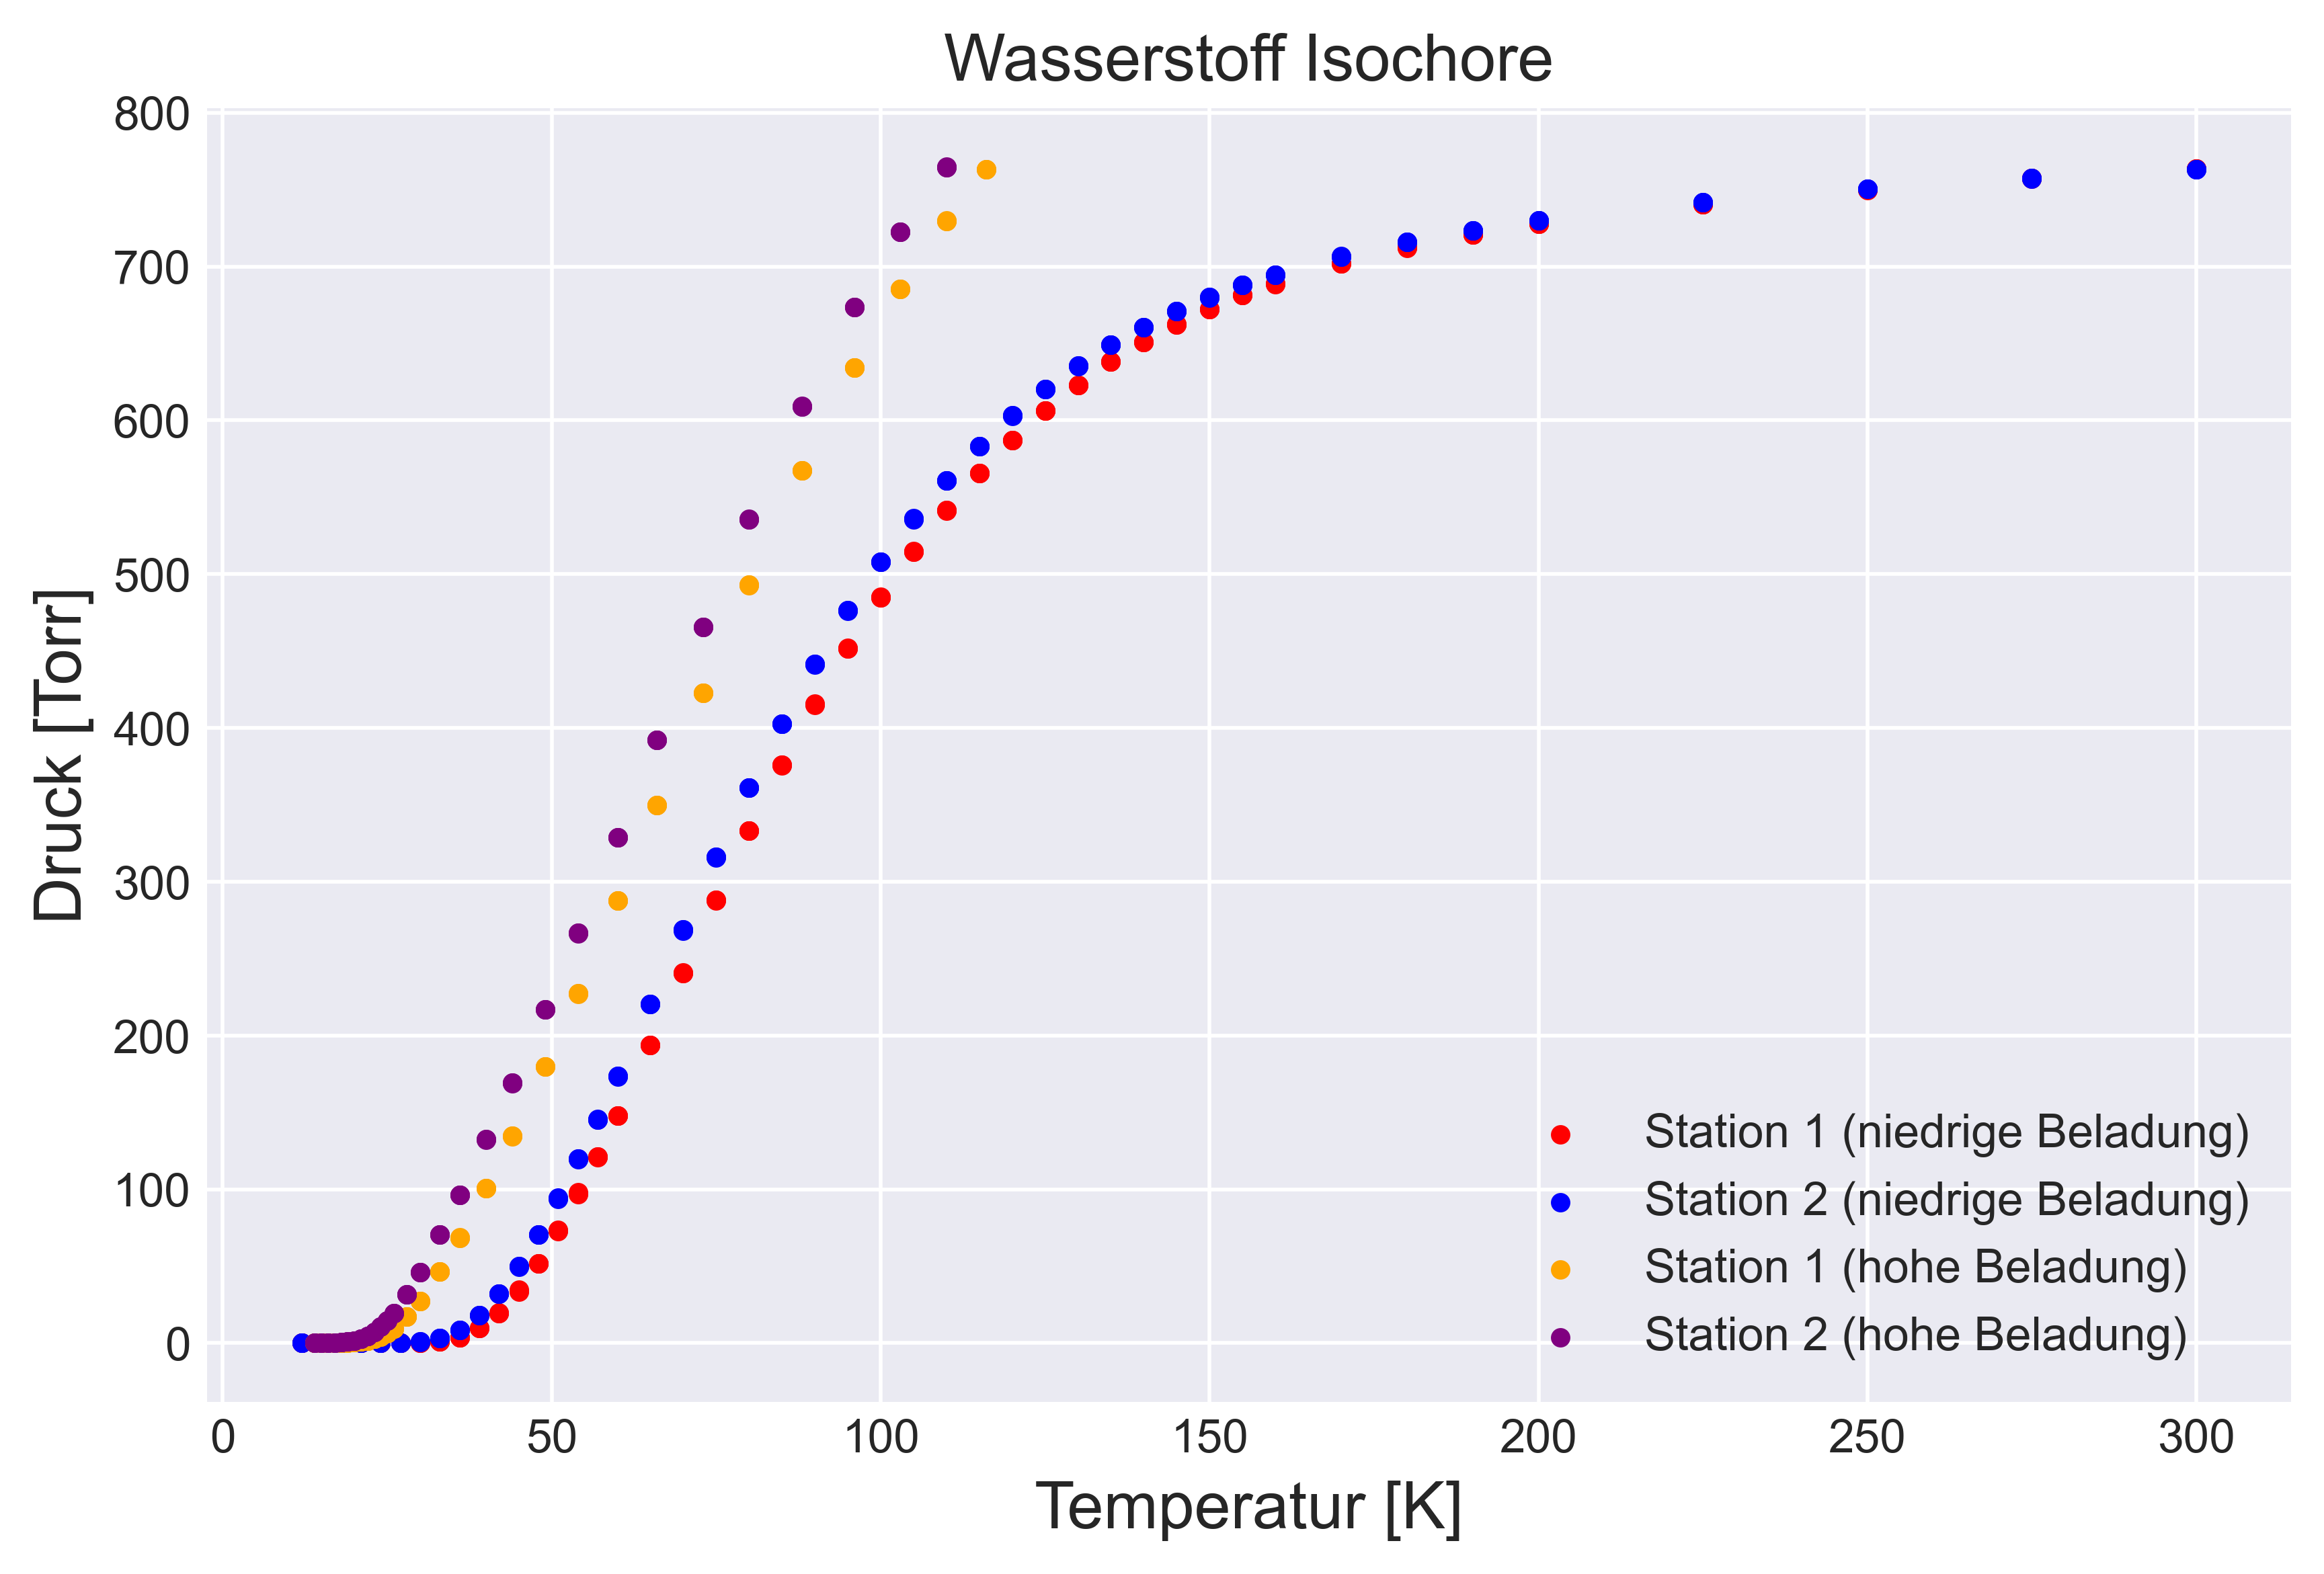

In [418]:
#Messchema: Pro T 3 Messwerte über eine Minute)
#Anfang:Tm=26.3°C pm 0.1K Tk=300K pm 0.01K  
#dT 15-57 0.1K  and  160-200 0.2K 225-300 0.5K dp für Sensor:Torr1000 von 800 - 8 Torr (google)
#bei 15K kurz warten (10min) und dann schauen wie sich das ganze beim aufwärmen verhält

Tk=[300,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,170,180,190,200,225,250,275,300]






p1=[762.2123,0.024110,0.030206,0.033484,0.036537,0.048062,0.10207,0.33053,1.19230,3.78907,9.6132,19.5347,34.8630,51.8603,73.6584,97.8866,121.1522,148.0854,193.8345,240.8905,288.1290,333.0977,375.5661,415.5671,451.3937,484.7489,514.6624,541.2355,565.5001,587.1866,606.1863,623.0485,638.0090,650.7599,662.3832,672.3740,681.5365,688.7642,701.9064,712.2641,720.8058,727.7104,740.5035,749.7007,757.2307,763.6440]
p1_st2=[762.0088,0.022722,0.027167,0.029930,0.036415,0.068513,0.22256,0.86592,3.05240,8.2900,18.1144,32.2852,49.9730,70.6601,94.5332,120.0998,145.5937,173.5932,220.5525,268.7357,316.2580,360.9850,402.7210,441.5522,476.1847,507.7794,535.6245,560.7192,583.1664,603.0046,620.2618,635.5322,649.0762,660.5931,670.9819,679.8787,688.1018,694.6567,706.5821,715.8968,723.5902,729.9599,741.7633,750.2544,757.1848,763.1211]

p2=[762.2230,0.024054,0.030224,0.033497,0.036542,0.048100,0.10110,0.32786,1.18833,3.80926,9.6056,19.8103,33.5697,51.8402,73.1098,97.0171,121.1820,147.8269,193.5744,240.6708,288.1540,333.2577,375.7769,414.8363,451.7558,484.9022,514.3221,541.5257,565.4551,587.1875,606.1357,623.0599,638.1169,650.8254,662.3938,672.3792,681.3701,688.8009,701.9223,712.3022,720.7495,727.7818,740.5260,749.8370,757.3764,763.6509]
p2_st2=[762.0194,0.022735,0.027184,0.029924,0.036513,0.069367,0.21776,0.85701,3.09984,8.3543,18.0929,32.2153,49.7195,70.5131,93.9876,119.8091,145.3844,173.2996,220.6004,268.1426,315.6526,360.9443,402.8431,441.5227,476.3822,507.9338,536.2212,560.9044,583.0589,603.0077,620.2761,635.319,649.1872,660.4914,670.9885,679.9539,688.0315,694.3850,706.5254,715.8770,723.5812,729.9886,741.7559,750.3381,757.4057,763.0692]

Tw=[26.3,27.1,27.2,27.3,27.4,27.5,27.6,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.6,27.6,27.5,27.5,27.4,27.4,27.4,27.4,27.4,27.4,27.3,27.3,27.3,27.3,27.3,27.3,27.3,27.2,27.2,27.2,27.2,27.2,27.2,27.2,27.2,27.2,27.2,27.2,27.2,27.2,27.2,27.1]

p3=[762.2543,0.024079,0.030255,0.033503,0.036558,0.04794,0.10079,0.33146,1.22713,3.81686,9.6328,19.6181,33.8687,51.7240,72.5267,96.6295,120.8509,147.7509,193.5955,240.3364,287.7066,333.1192,375.868,415.4122,451.8665,485.0280,514.7572,541.5043,565.5729,587.1831,606.1158,623.0744,638.1508,650.7713,662.4295,672.3378,681.3149,688.6203,701.9733,712.2042,720.7402,727.7815,740.5345,749.9368,757.3998,763.6757]
p3_st2=[762.0080,0.022736,0.027148,0.029929,0.036437,0.069319,0.21590,0.88330,3.07685,8.4250,18.0621,32.0113,49.9469,70.6028,93.6366,119.4026,145.1018,173.6635,220.5569,268.9999,316.0787,360.9405,402.8621,441.3104,476.4582,507.9562,536.0624,560.9784,583.2592,602.8863,620.2031,635.5409,649.1851,660.5829,670.9960,679.9146,688.0931,694.5971,706.5407,715.9091,723.5708,730.0618,741.6303,750.3604,757.2919,763.0811]


#####

p4=[762.2504]
p4_st2=[762.0224]

p5=[762.2247]
p5_st2=[762.0023]

plt.figure(figsize=(8, 5), dpi=500)


i=len(p1)
if len(Tw) != i: print("########### Tw ERROR ###############")
p_st1=[p1,p2,p3]
p_st2=[p1_st2,p2_st2,p3_st2]
l=0
for j in p_st1:
    if l == 0: plt.scatter(Tk[1:i],j[1:],c="red",s=10,label="Station 1 (niedrige Beladung)")
    else:plt.scatter(Tk[1:i],j[1:],c="red",s=10)
    l+=1
l=0    
for j in p_st2:
    
    if l == 0: plt.scatter(Tk[1:i],j[1:],c="blue",s=10,label="Station 2 (niedrige Beladung)")
    else:plt.scatter(Tk[1:i],j[1:],c="blue",s=10)
    l+=1
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Torr]")
plt.title("Hydrogen Isochore")


Tss=np.linspace(15,300,1000)
Tw=300
Vm=20.3930
Vk=3.70935
Vw=6.32841
R=8.31446*0.00750062*1e+6
n_ges=((Vm+Vk+Vw)*762.2)/(R*Tw)
ps=n_ges/((Vm+Vw)/(R*Tw)+Vk/(Tss*R))

#plt.plot(Tss,ps)
#plt.plot(Tss,ps*PropsSI("Z", "P", ps*133.322, "T", Tss, "Hydrogen"))

#plt.axvline(20, color='red', linestyle='--',label="20K")
#Messchema: Pro T 3 Messwerte über eine Minute)
#Anfang:
#dT 14- dt=0.1 dp für Sensor:Torr1000 von 800 - 8 Torr (google)


Tk=[14,15,16,17,18,19,20,21,22,23,24,25,26,28,30,33,36,40,44,49,54,60,66,73,80,88,96,103,110,116]

p1=[0.038851,0.050691,0.072851,0.11363,0.18902,0.31893,0.55401,0.94009,1.62332,2.74517,4.33534,6.50523,9.4884,17.1122,27.4069,46.5300,68.2879,100.6880,134.5411,179.6601,226.9222,287.6377,349.7261,422.5464,492.9128,567.3352,634.1700,685.1646,729.7090,763.3006]
p1_st2=[0.053720,0.09520,0.16672,0.29905,0.54716,0.97009,1.67332,2.85447,4.60915,7.12048,10.5573,14.8400,19.5402,31.6432,46.0465,70.3856,96.2377,132.3918,169.0745,216.7807,266.1396,328.6879,392.1158,465.6792,536.0492,609.0400,673.5964,722.3485,764.4566]

p2=[0.038967,0.051076,0.072448,0.11390,0.18835,0.31772,0.55178,0.96442,1.63206,2.73059,4.36628,6.66392,9.3966,17.1066,27.4030,46.5716,68.5036,100.6876,134.6631,179.6918,227.3400,287.6489,349.8148,422.6681,493.0674,567.4047,634.1464,685.2356,729.7059,763.2755]
p2_st2=[0.055076,0.09616,0.16644,0.30006,0.55304,0.97269,1.67296,2.84333,4.57890,7.1862,10.5738,14.8341,19.4659,31.6902,46.0344,70.3981,96.3865,132.3826,169.2181,216.7682,266.5477,328.6041,392.1555,465.7652,535.7000,609.1447,673.6565,722.4155,764.4657]

Tw=[27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.8,27.9,27.9,27.9,27.9,27.9,27.9,28,28,28,28,28,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.2]

p3=[0.037556,0.051050,0.072679,0.11359,0.18806,0.31891,0.53836,0.96207,1.62879,2.71738,4.31671,6.55841,9.3842,17.2353,27.3971,46.5906,68.6326,100.6773,134.7218,179.6389,227.4406,287.6489,349.7892,422.6861,492.6876,567.4104,634.1145,685.2901,729.8746,763.2610]
p3_st2=[0.0554997,0.09489,0.16705,0.29849,0.54377,0.96721,1.68917,2.92415,4.58811,7.1085,10.4970,14.7960,19.4706,31.6014,46.0334,70.4689,96.5350,132.4031,169.2617,216.8097,266.6109,328.6603,392.1466,465.7395,535.5692,609.0945,673.6652,722.4620,764.7103]






i=len(p1)
if len(Tw) != i: print("########### Tw ERROR ###############")
p_st1=[p1,p2,p3]
p_st2=[p1_st2,p2_st2,p3_st2]
l=0
for j in p_st1:
    if l == 0: plt.scatter(Tk[:i],j[:],c="orange",s=10,label="Station 1 (hohe Beladung)")
    else:plt.scatter(Tk[:i],j[:],c="orange",s=10)
    l+=1
l=0    
for j in p_st2:
    if l == 0: plt.scatter(Tk[:i-1],j[:],c="purple",s=10,label="Station 2 (hohe Beladung)")
    else:plt.scatter(Tk[:i-1],j[:],c="purple",s=10)
    l+=1
plt.xlabel("Temperatur [K]", fontsize=14)
plt.ylabel("Druck [Torr]", fontsize=14)
plt.title("Wasserstoff Isochore", fontsize=14)
plt.legend()

Abweichung von emty cell oben liegt an T-abhängigkeit der warmzone für warme bereiche!!!

Exp:  155.65938185067174
Linear:  87.06713717103617


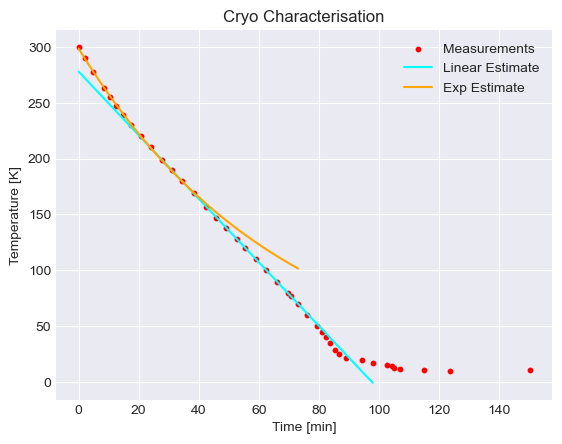

In [419]:
# Cryo Characterisation:
#p zu beginn:0.0055 pm 0.0002 mbar p zu 37min: 3.4 e-5 pm 0.1e-5 mbar p zu 50 min: 2.3 e-5 mbar p zu 65 min: 1.9 e-5 mbar p zu 77 min: 1.7 e-5 mbarp zu 87 min: 1.6 e-5 mbar p zu 102 min: 1.7 e-5 mbar p zu 125 min: 1.5 e-5 mbar p zu 150 min: 1.2 e-5 mbar
#1h TMP drauf
#Dt=0.015min
#RT=22 pm 1 
#leere zelle

T_cryo=np.array([300,290,277,263,255,247,239,230,220,210,199,190,180,169,157,147,138,128,120,110,100,90,80,77.35,70,60,50,45,40,35,29,25,22,19.4,17,15,14,13,12,10.8,10.375,10.9])
t_cryo=np.array([0,2.07,4.95,8.32,10.38,12.55,14.85,17.57,20.73,24.02,27.77,30.90,34.38,38.23,42.43,45.57,49.08,52.58,55.33,58.85,62.42,66.07,69.68,70.60,73.02,76.02,79.35,80.9,82.28,83.62,85.18,86.6,88.82,94.34,97.82,102.73,104.1,105.03,106.92,114.95,123.50,150])
i=len(t_cryo)
plt.scatter(t_cryo,T_cryo[:i],c="red",s=10,label="Measurements")
plt.title("Cryo Characterisation")
plt.ylabel("Temperature [K]")
plt.xlabel("Time [min]")
def exp(x,a,b):
    return a*np.exp(b*x)
def lin(x,a,b):
    return a*x+b
T_fit=T_cryo[:i]
params_cryo, covariance = curve_fit(exp, t_cryo[:14],T_fit[:14])
params_cryo_lin, covariance_lin = curve_fit(lin, t_cryo[9:25],T_fit[9:25])
plt.plot(t_cryo[:35] ,lin(t_cryo[:35],*params_cryo_lin),color="cyan",label="Linear Estimate")
plt.plot(t_cryo[:25],exp(t_cryo[:25],*params_cryo),color="orange",label="Exp Estimate")
T_goal=30
print("Exp: ",np.log(T_goal/params_cryo[0])/params_cryo[1])
print("Linear: ",(T_goal-params_cryo_lin[1])/params_cryo_lin[0])
plt.legend()


Exp:  156.46634895631863
Linear:  77.66666666663052


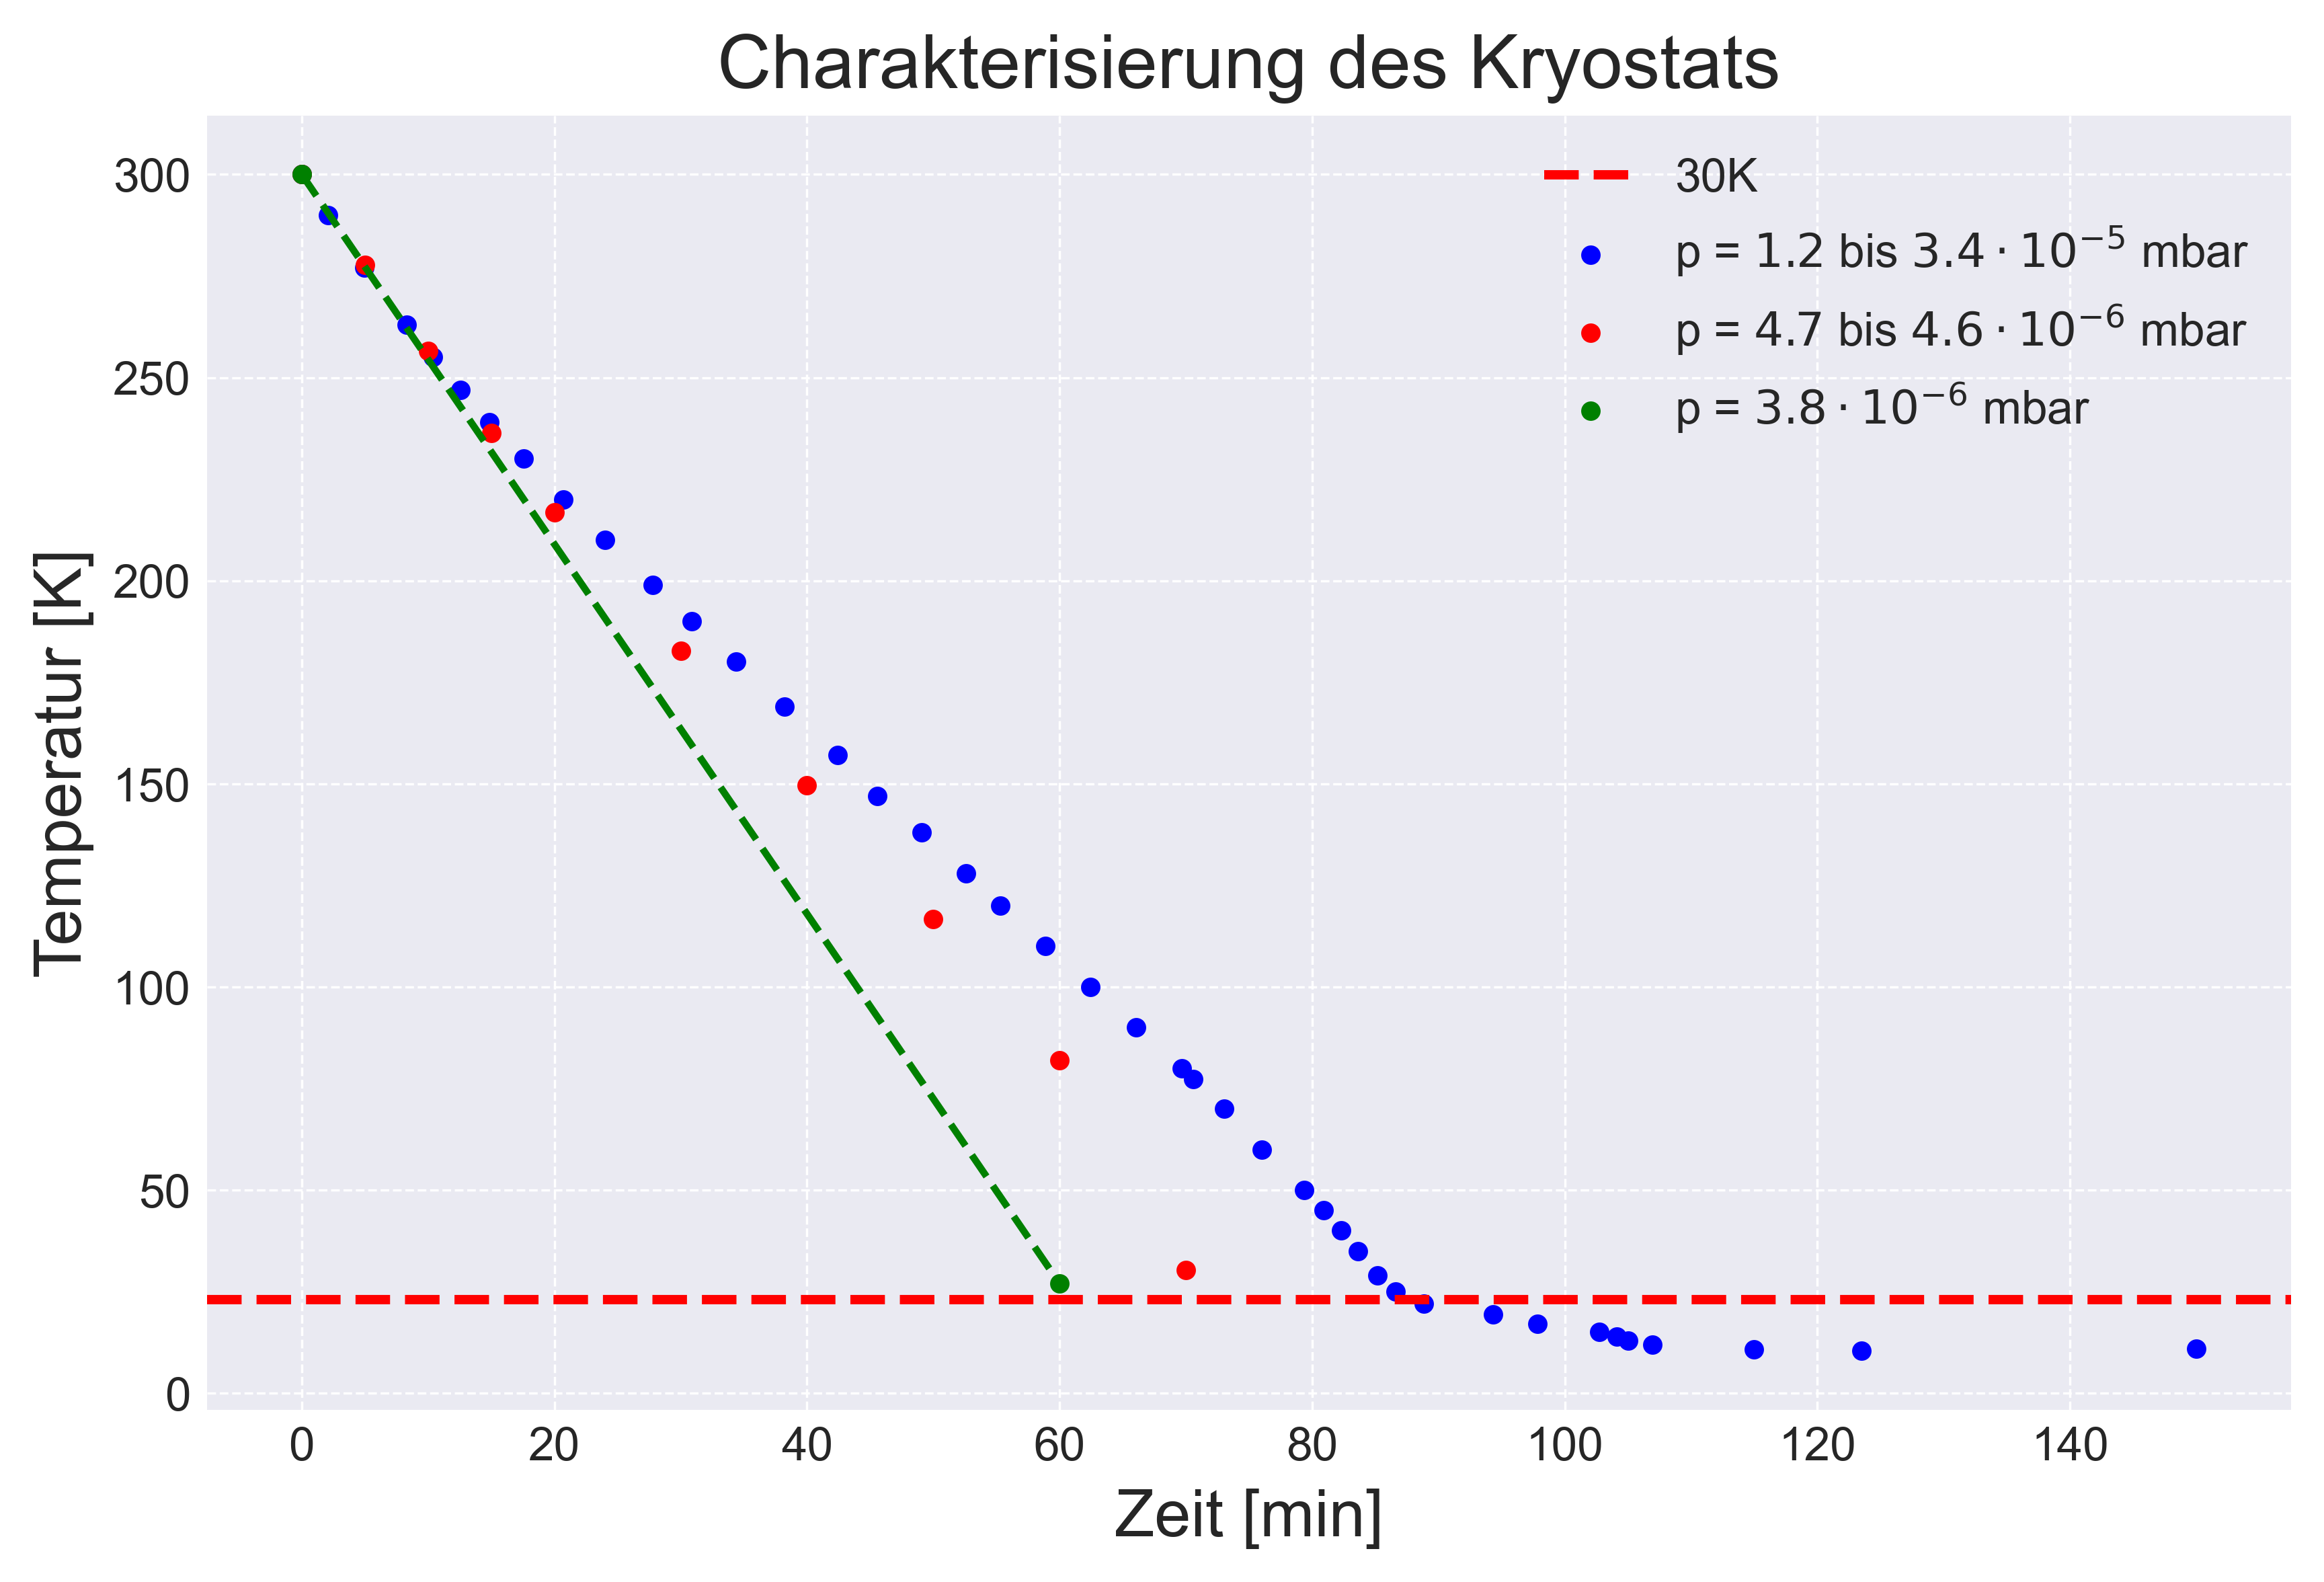

In [420]:
# Cryo Characterisation:
#p zu beginn:4.7 e-6 mbar zu ende: 4.6 e-6 mbar 
#20h TMP drauf
#Dt=0.5min
#RT=22 pm 1 
#leere zelle
plt.figure(figsize=(8, 5), dpi=500)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  
plt.axhline(y=23, color='red', linestyle='--', linewidth=2, label='30K')
plt.scatter(t_cryo,T_cryo[:i],c="blue",s=10,label=r"p = $1.2$ bis $3.4 \cdot 10^{-5}$ mbar")

T_cryo=np.array([300,277.7,256.5,236.3,216.9,182.7,149.6,116.7,81.9,30.3])
t_cryo=np.array([0,5,10,15,20,30,40,50,60,70,80,90,100])
i=len(T_cryo)
plt.scatter(t_cryo[:i],T_cryo,c="red",s=10,label=r"p = $4.7$ bis $4.6 \cdot 10^{-6}$ mbar")
plt.title("Charakterisierung des Kryostats",fontsize=16)
plt.ylabel("Temperatur [K]",fontsize=14)
plt.xlabel("Zeit [min]",fontsize=14)
def exp(x,a,b):
    return a*np.exp(b*x)
def lin(x,a,b):
    return a*x+b
t_fit=t_cryo[:i]
params_cryo, covariance = curve_fit(exp, t_fit[:6],T_cryo[:6])
params_cryo_lin, covariance_lin = curve_fit(lin, t_fit[4:9],T_cryo[4:9])

plt.scatter([0,60],[300,27],color="green",s=10,label=r"p = $3.8 \cdot 10^{-6}$ mbar")#dt=30sec p=3.8 e.06 mbar
plt.plot([0,60],[300,27],color="green",linestyle='--')
T_goal=23
print("Exp: ",np.log(T_goal/params_cryo[0])/params_cryo[1])
print("Linear: ",(T_goal-params_cryo_lin[1])/params_cryo_lin[0])
plt.legend()


In [421]:
print(PropsSI('T','P',101325,'Q',1,'Hydrogen'))
print(PropsSI('Z','T',100,'P',101325,'Hydrogen'))

20.36890353912102
0.9997891842833552


In [422]:
print(PropsSI('T','P',0.0005,'Q',0,'Nitrogen'))

ValueError: Pressure to PQ_flash [0.0005 Pa] must be in range [ 12519.8 Pa, 3.3958e+06 Pa] : PropsSI("T","P",0.0005,"Q",0,"Nitrogen")

In [424]:
Vmax_SC2=466 #pm 5cc/g
Vmax_208C=555 #pm 5cc/g

m_SC2=0.0979
m_208C=0.0883

nmax_SC2=Vmax_SC2*m_SC2/22400
nmax_208C=Vmax_208C*m_208C/22400
print("SC2 n",nmax_SC2*0.8)
print("208C n",nmax_208C*0.8)

Vm_208C=20.5806
Vm_SC2=20.3930

Tm=27.9+273.15
print("Tm",Tm)
D_SC2=0.0004201106406475256/(Vm_SC2*1e-6)
D_208C=0.0006372158348748616/(Vm_208C*1e-6) 


p_SC2=PropsSI('P','T',Tm,'DMOLAR',D_SC2,'Hydrogen')*0.00750062
p_208C=PropsSI('P','T',Tm,'DMOLAR',D_208C,'Hydrogen')*0.00750062
print("SC2 p",p_SC2)
print("208C p",p_208C)


SC2 n 0.0016293357142857145
208C n 0.001750232142857143
Tm 301.04999999999995
SC2 p 386.8865841600552
208C p 581.5611200899658


In [462]:
Tm=27.6+273.15
pm_SC2=739.6445666666667
nm_SC2=(Vm_SC2*1e-6)*PropsSI('DMOLAR','P',pm_SC2/0.00750062,'T',Tm,'Hydrogen')
pm_208C=85.68526666666666
nm_208C=(Vm_208C*1e-6)*PropsSI('DMOLAR','P',pm_208C/0.00750062,'T',Tm,'Hydrogen')
print("SC2 ",nm_SC2)
print("208C ",nm_208C)

SC2  0.0008037423047301741
208C  9.401513161412739e-05


In [463]:
print(9.401513161412739e-05+0.0008223992566358497+0.0008322134339937975)

0.0017486278222437748


In [461]:
print(np.mean([85.6783,85.6830,85.6945]))
print(np.mean([739.6263,739.6374,739.6700]))

85.68526666666666
739.6445666666667


In [454]:
print(0.0008571636093367445-1.841533541631419e-05)
print(0.001275090077736245-0.0008549794370887193)
print(0.0008620005281171984-1.851928966283935e-05)
print(0.005651420589212929-0.000862406680133312-0.000827813123489986-0.0008411719505080055-0.0008260749051696748-0.0008132568565827303-0.0008434812384543591)

0.0008387482739204302
0.0004201106406475256
0.0008434812384543591
0.0006372158348748616


1.Fill
T=27.6
ST1: p=759.0477 759.0401 759.0268
n=0.0008248041516443449
ST2: p= 758.9275 758.8922 758.8936
n=0.0008322451115950643


after Fill and cell closure:

T=27.6
ST1: p=0.021856,0.23376,0.023730 (sehr hohe fehler, da wert konstant steigt ~10%)
n=2.665480648197702e-08
nsys=0.0008247774968378629
nreq=0.0008045582174478516
p_req=740.3958437342039
ST2: p=0.022085,0.026715,0.027377
n=3.167760126668811e-08
nsys=0.0008322134339937975
nreq=0.0009180187088633455
p_req=837.1702905004686

2.Fill

ST1: p=739.6263,739.6374,739.6700
nsys= 0.001628519801568037
ST2: p=750.0240,750.0174,750.0134
n=0.0008225058691120541

after Fill and cell closure:

T=27.6

ST2: p=0.09649,0.09716,0.09746 
n=1.0661247620438919e-07
nsys=0.0008223992566358497+0.0008322134339937975
nreq=9.56194522274957e-05
p_req=87.14754149500648

3.Fill


ST2: p=85.6783,85.6830,85.6945
nsys=0.0017486278222437748

________________________________________________________________
Empty Cells:


n1_req=0.001275090077736245
n2_req=0.005651420589212929

1.Fill

T=28
ST1: p=811.4 pm 0.1Torr
n=0.0008804962448271741
 

ST2: p=811.1
n=0.0008882678020064111


after Fill and cell closure:




T=28
ST1: p=23.5
n=
nsys=0.0008549794370887193
nreq=0.0004201106406475256
p_req=387.01511195000774

ST2: p=23.6
n=
nsys=0.000862406680133312
nreq=0.004789013909079617
p_req= zu hoch


2.Fill
T=27.9
p1=391.1
nsys=0.0012796639313672872
--> Fertig

p2=785.8

-nach fill-

p2=29.9
n=0.0008280879937226206
nsys=0.0016904946738559327

3.Fill
T=28
p2=793.3
nach Fill
p2=25.2
nsys=0.0025316666243639383


4.Fill
T=27.9
p2=774.1
nach Fill
p2=19.8 
nsys= 0.003353106213929478


5.Fill
T=27.9
p2=772.0
nach Fill
p2=29.4
nsys= 0.0041617996962658565


6.Fill
T=27.9
p2=787.1
nach Fill
p2=16.9 
nsys=0.0050005479701862865

6.Fill
T=27.9
p2=579.5
nsys=0.005631733580119284
---> Fertig!


Text(0.5, 1.0, 'Hydrogen Isochore')

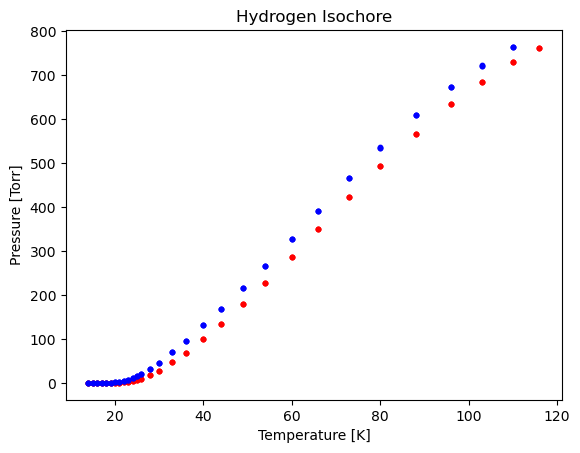

In [ ]:
#Messchema: Pro T 3 Messwerte über eine Minute)
#Anfang:
#dT 14- dt=0.1 dp für Sensor:Torr1000 von 800 - 8 Torr (google)


Tk=[14,15,16,17,18,19,20,21,22,23,24,25,26,28,30,33,36,40,44,49,54,60,66,73,80,88,96,103,110,116]

p1=[0.038851,0.050691,0.072851,0.11363,0.18902,0.31893,0.55401,0.94009,1.62332,2.74517,4.33534,6.50523,9.4884,17.1122,27.4069,46.5300,68.2879,100.6880,134.5411,179.6601,226.9222,287.6377,349.7261,422.5464,492.9128,567.3352,634.1700,685.1646,729.7090,763.3006]
p1_st2=[0.053720,0.09520,0.16672,0.29905,0.54716,0.97009,1.67332,2.85447,4.60915,7.12048,10.5573,14.8400,19.5402,31.6432,46.0465,70.3856,96.2377,132.3918,169.0745,216.7807,266.1396,328.6879,392.1158,465.6792,536.0492,609.0400,673.5964,722.3485,764.4566]

p2=[0.038967,0.051076,0.072448,0.11390,0.18835,0.31772,0.55178,0.96442,1.63206,2.73059,4.36628,6.66392,9.3966,17.1066,27.4030,46.5716,68.5036,100.6876,134.6631,179.6918,227.3400,287.6489,349.8148,422.6681,493.0674,567.4047,634.1464,685.2356,729.7059,763.2755]
p2_st2=[0.055076,0.09616,0.16644,0.30006,0.55304,0.97269,1.67296,2.84333,4.57890,7.1862,10.5738,14.8341,19.4659,31.6902,46.0344,70.3981,96.3865,132.3826,169.2181,216.7682,266.5477,328.6041,392.1555,465.7652,535.7000,609.1447,673.6565,722.4155,764.4657]

Tw=[27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.8,27.9,27.9,27.9,27.9,27.9,27.9,28,28,28,28,28,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.2]

p3=[0.037556,0.051050,0.072679,0.11359,0.18806,0.31891,0.53836,0.96207,1.62879,2.71738,4.31671,6.55841,9.3842,17.2353,27.3971,46.5906,68.6326,100.6773,134.7218,179.6389,227.4406,287.6489,349.7892,422.6861,492.6876,567.4104,634.1145,685.2901,729.8746,763.2610]
p3_st2=[0.0554997,0.09489,0.16705,0.29849,0.54377,0.96721,1.68917,2.92415,4.58811,7.1085,10.4970,14.7960,19.4706,31.6014,46.0334,70.4689,96.5350,132.4031,169.2617,216.8097,266.6109,328.6603,392.1466,465.7395,535.5692,609.0945,673.6652,722.4620,764.7103]






i=len(p1)
if len(Tw) != i: print("########### Tw ERROR ###############")
p_st1=[p1,p2,p3]
p_st2=[p1_st2,p2_st2,p3_st2]

for j in p_st1:
    
    plt.scatter(Tk[:i],j[:],c="red",s=10)
    
for j in p_st2:
    plt.scatter(Tk[:i-1],j[:],c="blue",s=10)

plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Torr]")
plt.title("Hydrogen Isochore")








In [ ]:
Vm2=20.5806
Vm1=20.3930

p0=753.22
p1=501.66
Vc=(p0*Vm1-p1*Vm1)/p1
print("ST1",Vc)


p0=752.95
p1=481.25
Vc=(p0*Vm2-p1*Vm2)/p1
print("ST2",Vc)

ST1 10.226175258142964
ST2 11.619218742857145


In [ ]:
print(PropsSI('DMOLAR','P',760/0.00750062,'T',300,'Hydrogen')*(Vm1+10.224)*1e-6)
print(PropsSI('DMOLAR','P',760/0.00750062,'T',300,'Hydrogen')*(Vm2+11.618)*1e-6)
print(PropsSI('DMOLAR','P',760/0.00750062,'T',20.368,'Hydrogen')*0.190*1e-6)
print(PropsSI('DMOLAR','P',760/0.00750062,'T',20.368,'Hydrogen')*0.212*1e-6)

0.0012429852746786024
0.0013071948807938873
0.006677673581781445
0.007450877891250877


Cell Volume Measurement: 
Pc=0.01Torr
RT=21.2 (Beginn) 22 (Ende)
Tcryo=300.00K

V1: Tm=26.8 pm 0.1
ST1
p0=774.61 pm 0.05
p1=515.96
Vc=10.22298133576246

St2
p0=774.32
p1=494.95
Vc=11.616531411253664

V2:Tm=26.8
ST1
p0=763.46
p1=508.52
Vc=10.22376980256431

St2
p0=763.20
p1=487.83
Vc=11.617325342844849

V3:Tm=26.8
ST1
p0=753.22
p1=501.66
Vc=10.226175258142964

St2
p0=752.95
p1=481.25
Vc=11.619218742857145

p0Vm/(RT)=p1Vm/(RT)+p1Vc/(RT)
Vc=(p0Vm-p1Vm)/p1

Mean Cell Volume SC2:10.224
Mean Cell Volume 208C:11.618

VSC2:10.224-10.034=0.190
V208C:11.618-11.406=0.212

nH2 @760 Torr and 300K in SC2 Zelle:0.0012429852746786024
nH2 @760 Torr and 300K in 208C Zelle:0.0013071948807938873
mean:0.001275090077736245


nH2 in VSC2 @20.37K:0.006677673581781445
nH2 in V208C @20.37K:0.007450877891250877
mean:0.007064275736516161
80%:0.005651420589212929

Text(0.5, 1.0, 'Helium Isochore Empty Cell')

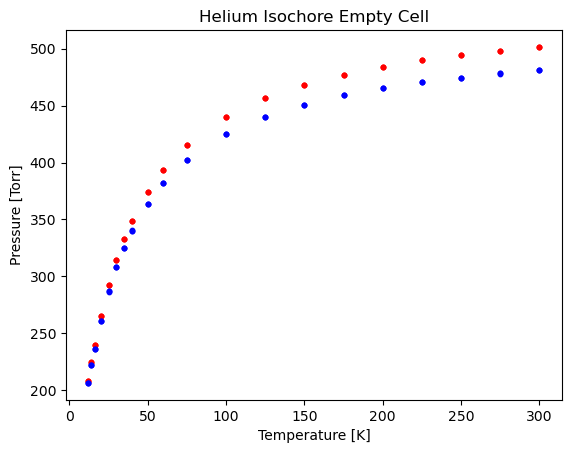

In [ ]:
#Messchema: Pro T 3 Messwerte über eine Minute)
#Anfang:
#dT=0.1K dp für Sensor:Torr1000 von 800 - 8 Torr (google)
#pm1:753.22 pm2:752.95
#RT= 22

Tk=[300,275,250,225,200,175,150,125,100,75,60,50,40,35,30,25,20,16,14,12.1]

p1=[501.6315,498.3587,494.4597,489.7901,484.0303,477.2350,468.3611,456.4214,439.8995,415.2504,393.5582,374.2754,348.9380,332.9506,314.6314,292.3601,265.0525,239.3778,224.2847,208.3556]
p1_st2=[481.2457,478.3014,474.7526,470.4890,465.3067,459.0861,450.9778,440.0854,424.8383,402.0472,381.9331,363.9506,340.3697,325.2886,308.0166,286.6997,260.9347,236.3993,222.1252,206.5172]

p2=[501.6364,498.2820,494.4835,489.7980,484.0332,477.2467,468.3227,456.4147,439.8476,415.1735,393.5467,374.2338,348.8985,332.9632,314.6075,292.2811,265.1222,239.3749,224.6473,208.2479]
p2_st2=[481.1919,478.2988,474.7322,470.5385,465.2703,459.0849,451.0113,440.0611,424.8359,402.0250,381.9032,363.9159,340.3111,325.3202,308.0428,286.9011,260.9620,236.5788,222.1469,206.4682]

Tw=[26.8,26.8,26.8,26.9,26.9,27.1,27.4,27.8,28,28,28,28.1,28.1,28.1,28.1,28.1,28.1,28,28,28]

p3=[501.6013,498.3830,494.4621,489.7272,484.0327,477.2238,468.3271,456.3944,439.8139,415.1720,393.5278,374.2301,348.8922,332.9347,314.7168,292.1513,264.9800,239.5085,224.3841,208.0932]
p3_st2=[481.2353,478.2630,474.7632,470.4608,465.2617,459.0519,451.0094,440.0583,424.8291,402.0384,381.8482,363.9109,340.2535,325.3055,308.0646,286.8347,260.8912,236.5030,222.1426,206.3865]






i=len(p1)
if len(Tw) != i: print("########### Tw ERROR ###############")
p_st1=[p1,p2,p3]
p_st2=[p1_st2,p2_st2,p3_st2]

for j in p_st1:
    
    plt.scatter(Tk[:i],j[:],c="red",s=10)
    
for j in p_st2:
    plt.scatter(Tk[:i],j[:],c="blue",s=10)

plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Torr]")
plt.title("Helium Isochore Empty Cell")





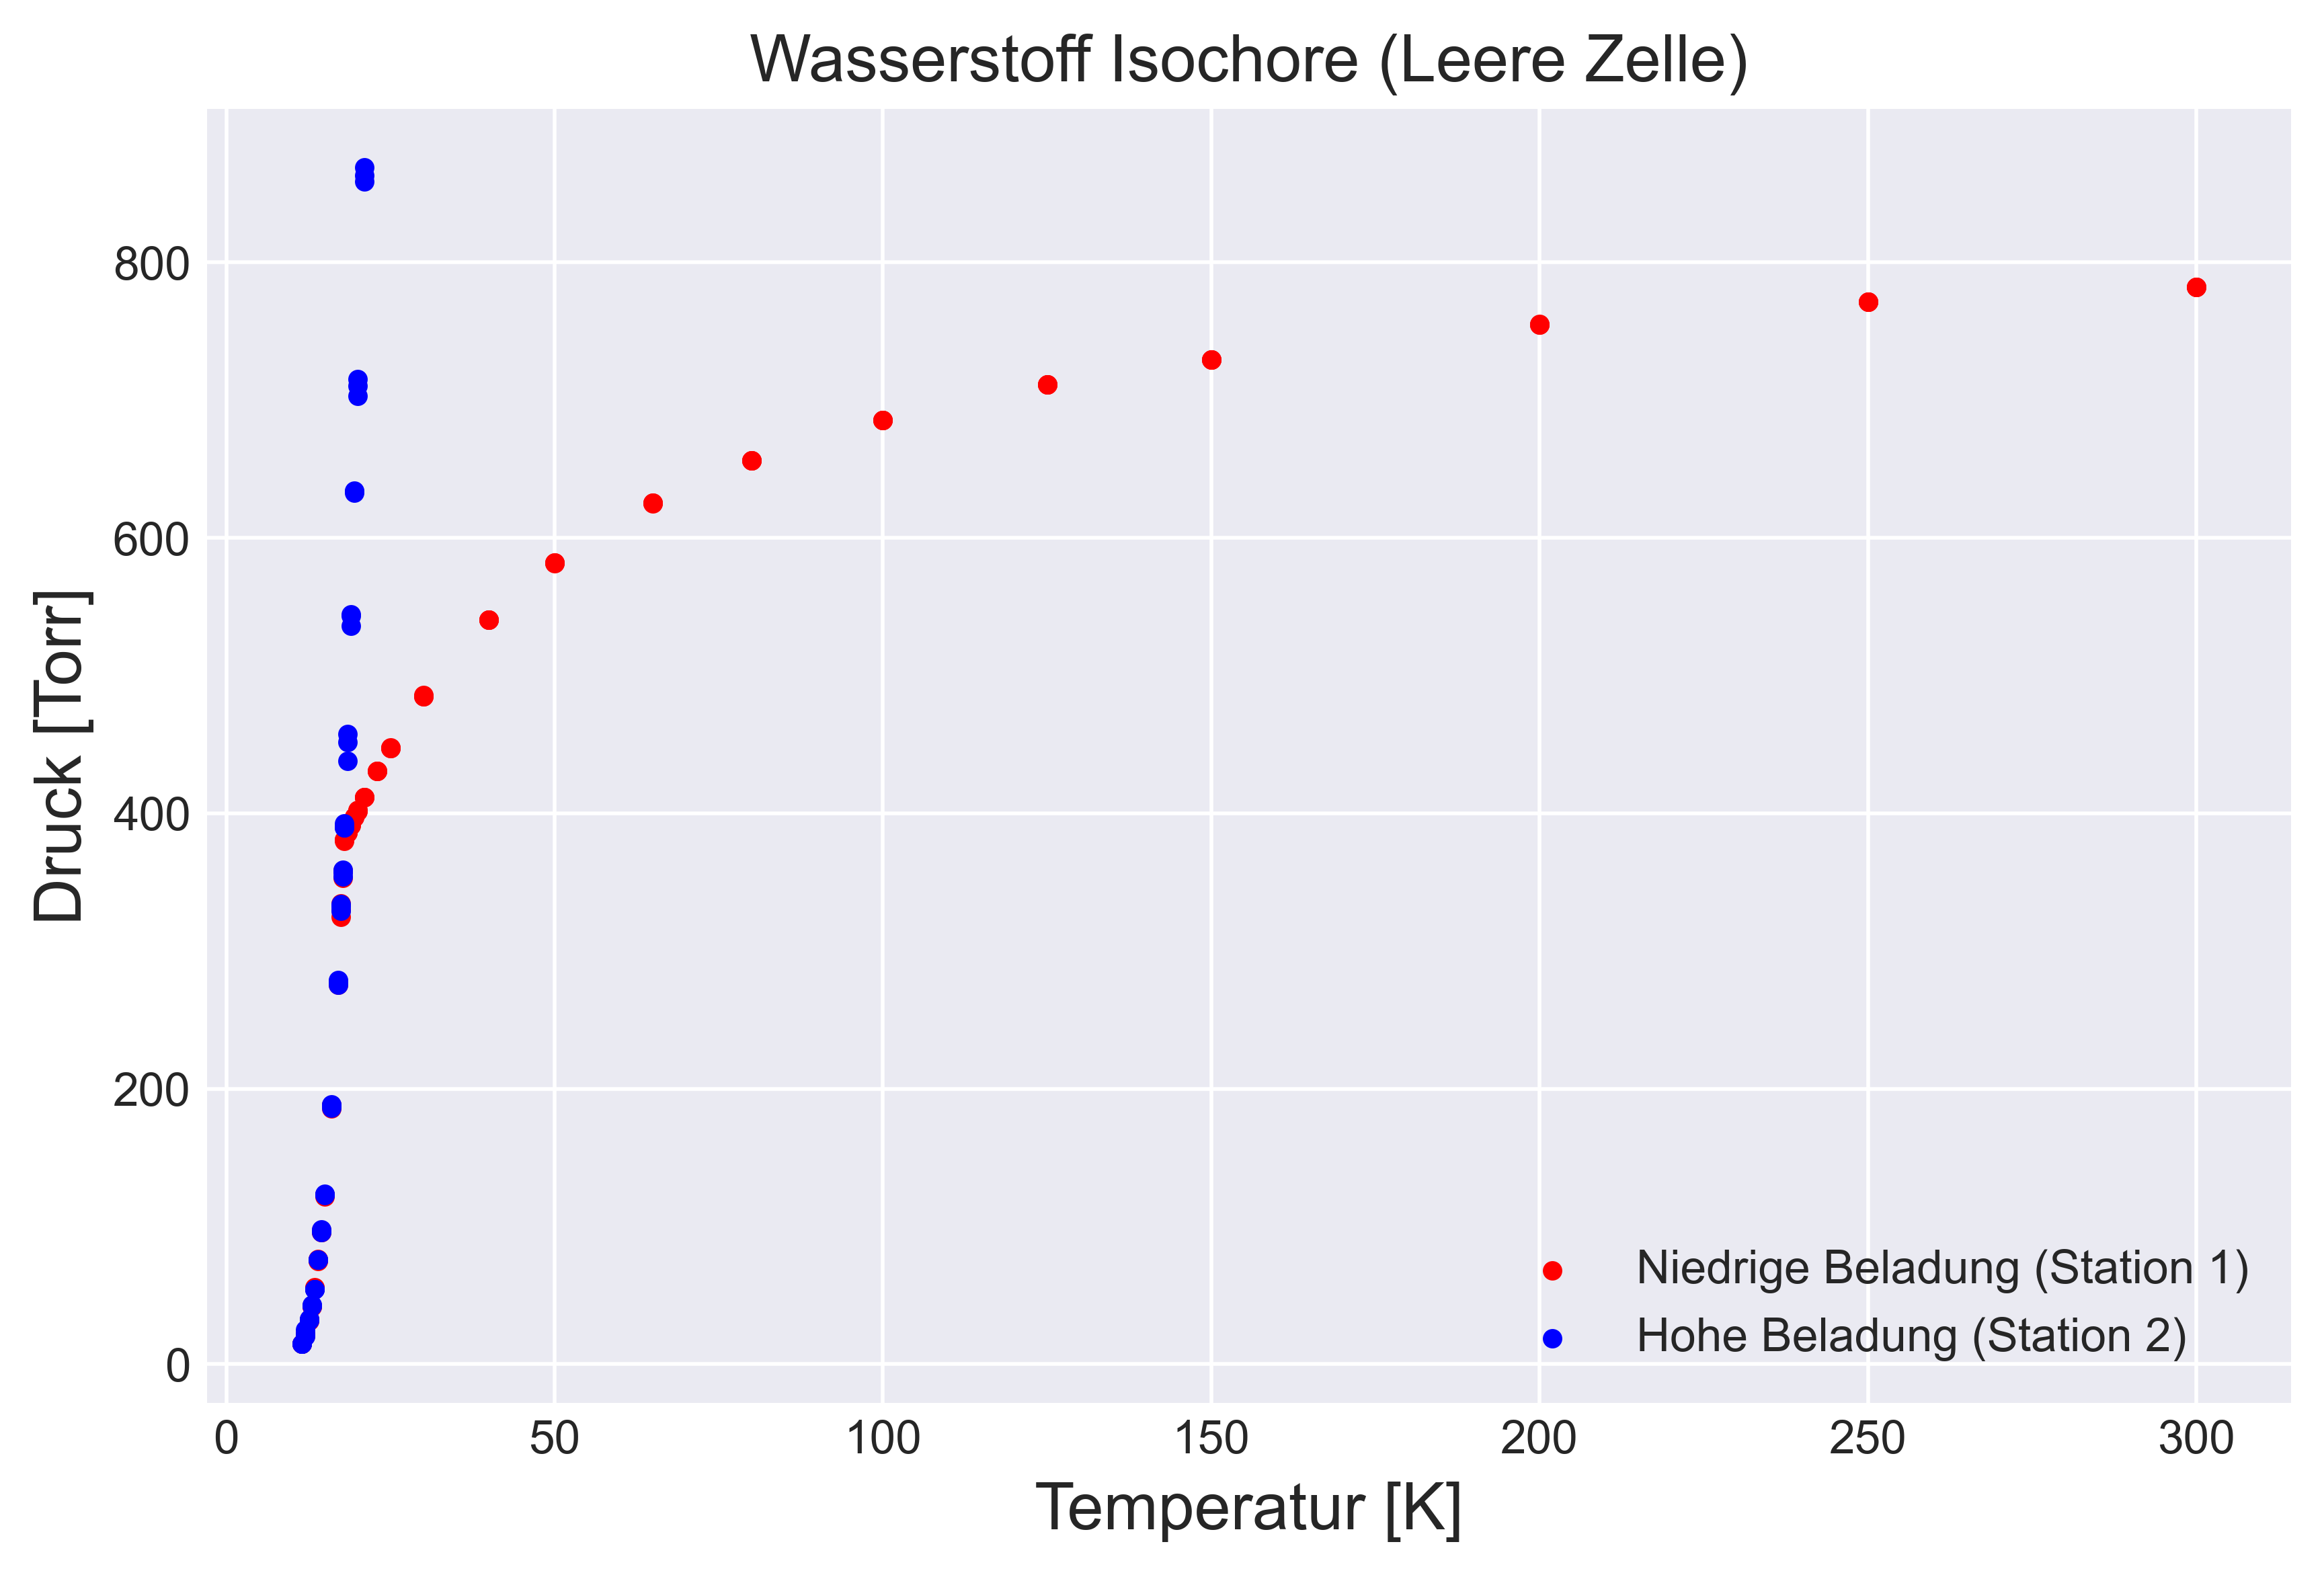

In [ ]:
#Messchema: Pro T 3 Messwerte über eine Minute)
#Anfang:
#dT 0.1K dp für Sensor:Torr1000 von 800 - 8 Torr (google)


Tk=[11.5,12,12.6,13,13.5,14,14.5,15,16,17,18,19,17.5,17.75,18.5,20,19.5,21,23,25,30,40,50,65,80,100,125,150,200,250,300]

p1=[14.8835,20.5343,32.1264,41.4447,54.5866,75.0244,95.8002,121.7089,185.6231,276.9456,380.6175,391.1505,334.5350,352.9124,385.9556,402.3716,397.3071,411.5886,430.6522,447.9042,485.8481,540.6257,581.7264,625.0871,655.9260,685.3625,711.0686,729.3015,754.9119,771.2163,781.9521]
p1_st2=[14.8843,21.8821,31.7741,42.0681,54.1275,75.6810,95.6673,122.5870,186.0016,277.8195,389.4999,535.9084,334.1811,353.8462,437.9936,703.1621,632.727,868.69307]

p2=[14.5832,21.4262,31.9756,41.8869,55.2277,75.5245,95.8503,122.8740,188.1901,277.9900,380.0364,392.1356,329.4476,357.9862,386.4386,401.9515,397.5786,411.7374,430.6598,447.4274,484.6321,540.5861,581.6420,625.1473,655.9181,685.3052,711.0527,729.3521,754.8620,771.1711,781.9038]
p2_st2=[14.8962,25.2016,32.5174,42.5193,54.1256,75.6712,96.7506,123.5647,187.9901,278.9583,389.5132,543.1606,329.1413,357.1257,451.6606,710.2735,633.6785,863.2618]

Tw=[27.9,27.9,27.9,27.9,27.8,27.8,27.8,27.8,27.8,27.8,27.8,27.8,27.8,27.8,27.8,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.6,27.6,27.5,27.5]

p3=[14.8545,21.6044,31.5704,42.0143,55.8266,76.1294,97.0401,123.3773,188.0044,275.3400,380.6034,391.7493,324.6901,358.2354,386.2160,401.3683,397.0181,411.7344,430.7273,447.3881,484.6452,540.6407,581.6822,625.2990,655.9888,685.2759,711.0117,729.3854,754.9397,771.1777,781.9135]
p3_st2=[15.0149,20.2931,32.6086,43.0869,54.0933,75.8245,97.5315,123.2837,188.5045,275.5325,392.6288,544.0958,331.8349,358.7651,457.3934,715.2832,634.1339,858.8098]


plt.figure(figsize=(8, 5), dpi=500)



i=len(p1)

if len(Tw) != i: print("########### Tw ERROR ###############")
p_st1=[p1,p2,p3]
p_st2=[p1_st2,p2_st2,p3_st2]
l=0
for j in p_st1:
    if l == 0: plt.scatter(Tk[:i],j[:],c="red",s=10,label="Niedrige Beladung (Station 1)")
    else:plt.scatter(Tk[:i],j[:],c="red",s=10)
    l+=1
l=0 
for j in p_st2:
    if l == 0: plt.scatter(Tk[:18],j[:18],c="blue",s=10,label="Hohe Beladung (Station 2)")
    else:plt.scatter(Tk[:18],j[:18],c="blue",s=10)
    l+=1


plt.xlabel("Temperatur [K]",fontsize=14)
plt.ylabel("Druck [Torr]",fontsize=14)
plt.title("Wasserstoff Isochore (Leere Zelle)",fontsize=14)
plt.legend(loc="lower right")






